In [2]:
import pandas as pd
import os
import pickle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

os.chdir('/content/drive/MyDrive/SI 630 project')
# os.listdir('.')

Mounted at /content/drive


In [4]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')


['sct',
 'text',
 'original - unedited version of edited files',
 'meddra - unedited version of edited files',
 'sct - unedited version of edited files',
 'original',
 'meddra']

In [5]:
suf = '_v3'

data_save_dir = 'data'+suf

suf += '_finetune_glove'

In [6]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [7]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [8]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [9]:
len(docs)

1186

In [10]:
temp = docs[0]
temp

Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"/

In [11]:
temp.annotation_layers

{'ner': ['Token[0]: "i"'/'O' (1.0),
  'Token[1]: "feel"'/'O' (1.0),
  'Token[2]: "a"'/'O' (1.0),
  'Token[3]: "bit"'/'B-ADR' (1.0),
  'Token[4]: "drowsy"'/'I-ADR' (1.0),
  'Token[5]: "&"'/'O' (1.0),
  'Token[6]: "have"'/'O' (1.0),
  'Token[7]: "a"'/'O' (1.0),
  'Token[8]: "little"'/'B-ADR' (1.0),
  'Token[9]: "blurred"'/'I-ADR' (1.0),
  'Token[10]: "vision"'/'I-ADR' (1.0),
  'Token[11]: ","'/'O' (1.0),
  'Token[12]: "so"'/'O' (1.0),
  'Token[13]: "far"'/'O' (1.0),
  'Token[14]: "no"'/'O' (1.0),
  'Token[15]: "gastric"'/'B-ADR' (1.0),
  'Token[16]: "problems"'/'I-ADR' (1.0),
  'Token[17]: "."'/'O' (1.0),
  'Token[18]: "ive"'/'O' (1.0),
  'Token[19]: "been"'/'O' (1.0),
  'Token[20]: "on"'/'O' (1.0),
  'Token[21]: "arthrotec"'/'B-Drug' (1.0),
  'Token[22]: "50"'/'O' (1.0),
  'Token[23]: "for"'/'O' (1.0),
  'Token[24]: "over"'/'O' (1.0),
  'Token[25]: "10"'/'O' (1.0),
  'Token[26]: "years"'/'O' (1.0),
  'Token[27]: "on"'/'O' (1.0),
  'Token[28]: "and"'/'O' (1.0),
  'Token[29]: "off"'/'O' (

In [12]:

# define your NER tags
label_dict = {
    'ADR': 'ADR',
    'Drug': 'Drug',
    'Finding': 'Finding',
    'Symptom': 'Symptom',
    'Disease': 'Disease'
}

In [13]:
from flair.data import Corpus

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from sklearn.model_selection import train_test_split

from torch.optim import AdamW, SGD

from flair.visual.training_curves import Plotter
plotter = Plotter()



train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

corpus = Corpus(train=train_docs, dev=dev_docs, test=test_docs) # Corpus: 948 train + 119 dev + 119 test sentences
corpus.filter_empty_sentences()
# # create a tag dictionary
labels = ['ADR', 'Drug', 'Finding', 'Symptom', 'Disease']
# tag_dictionary = Dictionary(add_unk=True)
# for label in labels:
#     tag_dictionary.add_item(label)
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.span_labels)

# create a stacked embedding using GloVe and Flair embeddings
stacked_embeddings = StackedEmbeddings([
    WordEmbeddings('glove',
                   force_cpu=False,
                #    embedding_length=1024,
                   fine_tune=True,
                   ),
    # TransformerWordEmbeddings('emilyalsentzer/Bio_ClinicalBERT', layers="-1",
    #                                    subtoken_pooling="first",
    #                                    is_document_embedding=True,
    #                                    fine_tune=True,
    #                                    use_context=True,
    #                                    max_seq_length=1024,
    #                                    ),
    FlairEmbeddings('news-forward',
                    # fine_tune=True
                    ),
    FlairEmbeddings('news-backward',
                    # fine_tune=True
                    ),
])
# https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md

# create a SequenceTagger object and specify the tag dictionary and embeddings to use
tagger = SequenceTagger(hidden_size=256,
                        embeddings=stacked_embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        # use_crf=False,
                        # use_rnn=False,
                        # reproject_embeddings=False,
                        )
tagger.predict_spans = False

print(tagger._determine_if_span_prediction_problem(tagger.label_dictionary))
print(tagger.predict_spans)

# https://github.com/flairNLP/flair/blob/master/flair/trainers/trainer.py
# create a ModelTrainer object and train the tagger
trainer = ModelTrainer(tagger, corpus)

2023-04-21 05:14:11,879 Filtering empty sentences
2023-04-21 05:14:11,941 Corpus: 948 train + 119 dev + 119 test sentences
2023-04-21 05:14:11,943 Computing label dictionary. Progress:


948it [00:00, 6664.01it/s]

2023-04-21 05:14:12,090 Dictionary created for label 'ner' with 12 values: O (seen 79057 times), I-ADR (seen 7953 times), B-ADR (seen 4712 times), B-Drug (seen 1396 times), I-Finding (seen 349 times), B-Finding (seen 309 times), B-Disease (seen 231 times), B-Symptom (seen 222 times), I-Symptom (seen 218 times), I-Disease (seen 169 times), I-Drug (seen 161 times)
False


2023-04-21 05:14:12,646 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpbnjb1o6c


100%|██████████| 153M/153M [00:07<00:00, 20.7MB/s]

2023-04-21 05:14:20,775 copying /tmp/tmpbnjb1o6c to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2023-04-21 05:14:20,892 removing temp file /tmp/tmpbnjb1o6c
2023-04-21 05:14:21,294 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp194uz_l2


100%|██████████| 20.5M/20.5M [00:01<00:00, 12.6MB/s]

2023-04-21 05:14:23,402 copying /tmp/tmp194uz_l2 to cache at /root/.flair/embeddings/glove.gensim
2023-04-21 05:14:23,420 removing temp file /tmp/tmp194uz_l2


2023-04-21 05:14:34,673 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpdbpj7jhe


100%|██████████| 69.7M/69.7M [00:03<00:00, 18.6MB/s]

2023-04-21 05:14:39,008 copying /tmp/tmpdbpj7jhe to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2023-04-21 05:14:39,063 removing temp file /tmp/tmpdbpj7jhe
2023-04-21 05:14:44,016 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpfns0l7k6


100%|██████████| 69.7M/69.7M [00:03<00:00, 18.4MB/s]

2023-04-21 05:14:48,384 copying /tmp/tmpfns0l7k6 to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2023-04-21 05:14:48,439 removing temp file /tmp/tmpfns0l7k6


2023-04-21 05:14:48,669 SequenceTagger predicts: Dictionary with 12 tags: <unk>, O, I-ADR, B-ADR, B-Drug, I-Finding, B-Finding, B-Disease, B-Symptom, I-Symptom, I-Disease, I-Drug
True
False


In [14]:
# !tensorboard --logdir=runs
# http://localhost:6006/

In [15]:
hist = trainer.train('flair_ner_model'+suf,
              embeddings_storage_mode='gpu',
              gold_label_dictionary_for_eval=tag_dictionary,
              mini_batch_size = 12,
              eval_batch_size = 12,
              patience=1,
              anneal_factor = 0.5,
              anneal_against_dev_loss=True,
              main_evaluation_metric = ("weighted avg", "f1-score"),
              metrics_for_tensorboard=[("weighted avg", 'precision'), ("weighted avg", 'recall'), ("macro avg", 'f1-score'), ("macro avg", 'precision'), ("macro avg", 'recall')],
              use_tensorboard=True,
              tensorboard_comment='Flair NER',
              tensorboard_log_dir='runs/tb_logs'+suf,
              min_learning_rate=3e-8,
              optimizer=AdamW,
              learning_rate=1e-1,
              weight_decay=0.001,
              max_epochs=100,
              monitor_train=True,
              save_optimizer_state=True,)
# hist

2023-04-21 05:14:48,938 tensorboard logging path is runs/tb_logs_v3_finetune_glove
2023-04-21 05:14:48,948 ----------------------------------------------------------------------------------------------------
2023-04-21 05:14:48,950 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (rnn): LSTM(4196, 256, batch_first=True, bidirectio

100%|██████████| 79/79 [00:22<00:00,  3.50it/s]

2023-04-21 05:15:45,468 Evaluating as a multi-label problem: True


2023-04-21 05:15:47,287 TRAIN : loss 1.346351981163025 - f1-score (weighted avg)  0.23


100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

2023-04-21 05:15:51,783 Evaluating as a multi-label problem: False
2023-04-21 05:15:51,845 DEV : loss 1.3821823596954346 - f1-score (weighted avg)  0.241
2023-04-21 05:15:51,871 BAD EPOCHS (no improvement): 0
2023-04-21 05:15:51,876 saving best model


2023-04-21 05:15:54,669 ----------------------------------------------------------------------------------------------------
2023-04-21 05:15:56,463 epoch 2 - iter 7/79 - loss 1.92555374 - time (sec): 1.79 - samples/sec: 4466.73 - lr: 0.100000
2023-04-21 05:15:58,442 epoch 2 - iter 14/79 - loss 1.83595439 - time (sec): 3.77 - samples/sec: 4416.85 - lr: 0.100000
2023-04-21 05:16:00,357 epoch 2 - iter 21/79 - loss 1.85039199 - time (sec): 5.68 - samples/sec: 4472.97 - lr: 0.100000
2023-04-21 05:16:02,201 epoch 2 - iter 28/79 - loss 1.90925509 - time (sec): 7.53 - samples/sec: 4365.36 - lr: 0.100000
2023-04-21 05:16:04,628 epoch 2 - iter 35/79 - loss 1.95371199 - time (sec): 9.96 - samples/sec: 4188.62 - lr: 0.100000
2023-04-21 05:16:06,487 epoch 2 - iter 42/79 - loss 1.94622767 - time (sec): 11.82 - samples/sec: 4196.36 - lr: 0.100000
2023-04-21 05:16:08,351 epoch 2 - iter 49/79 - loss 1.96358765 - time (sec): 13.68 - samples/sec: 4160.25 - lr: 0.100000
2023-04-21 05:16:10,448 epoch 2 - 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:16:39,245 Evaluating as a multi-label problem: True


2023-04-21 05:16:41,073 TRAIN : loss 1.5259631872177124 - f1-score (weighted avg)  0.0992


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:16:43,953 Evaluating as a multi-label problem: False
2023-04-21 05:16:44,017 DEV : loss 1.5512405633926392 - f1-score (weighted avg)  0.1093
2023-04-21 05:16:44,038 BAD EPOCHS (no improvement): 1
2023-04-21 05:16:44,042 ----------------------------------------------------------------------------------------------------


2023-04-21 05:16:45,881 epoch 3 - iter 7/79 - loss 1.93955722 - time (sec): 1.84 - samples/sec: 5097.03 - lr: 0.100000
2023-04-21 05:16:47,826 epoch 3 - iter 14/79 - loss 1.90841998 - time (sec): 3.78 - samples/sec: 4996.52 - lr: 0.100000
2023-04-21 05:16:49,698 epoch 3 - iter 21/79 - loss 1.90032854 - time (sec): 5.65 - samples/sec: 4751.75 - lr: 0.100000
2023-04-21 05:16:51,481 epoch 3 - iter 28/79 - loss 1.91833384 - time (sec): 7.44 - samples/sec: 4744.55 - lr: 0.100000
2023-04-21 05:16:53,340 epoch 3 - iter 35/79 - loss 2.09527665 - time (sec): 9.30 - samples/sec: 4678.40 - lr: 0.100000
2023-04-21 05:16:54,899 epoch 3 - iter 42/79 - loss 2.11474998 - time (sec): 10.86 - samples/sec: 4694.33 - lr: 0.100000
2023-04-21 05:16:56,713 epoch 3 - iter 49/79 - loss 2.13092565 - time (sec): 12.67 - samples/sec: 4643.09 - lr: 0.100000
2023-04-21 05:16:58,424 epoch 3 - iter 56/79 - loss 2.12159176 - time (sec): 14.38 - samples/sec: 4653.58 - lr: 0.100000
2023-04-21 05:17:00,502 epoch 3 - iter

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:17:27,388 Evaluating as a multi-label problem: True


2023-04-21 05:17:29,211 TRAIN : loss 1.5675063133239746 - f1-score (weighted avg)  0.2498


100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

2023-04-21 05:17:32,078 Evaluating as a multi-label problem: False
2023-04-21 05:17:32,147 DEV : loss 1.5757861137390137 - f1-score (weighted avg)  0.2628
2023-04-21 05:17:32,168 Epoch     3: reducing learning rate of group 0 to 5.0000e-02.
2023-04-21 05:17:32,170 BAD EPOCHS (no improvement): 2
2023-04-21 05:17:32,174 ----------------------------------------------------------------------------------------------------


2023-04-21 05:17:33,976 epoch 4 - iter 7/79 - loss 1.98717526 - time (sec): 1.80 - samples/sec: 4762.89 - lr: 0.050000
2023-04-21 05:17:35,740 epoch 4 - iter 14/79 - loss 1.97315488 - time (sec): 3.56 - samples/sec: 4909.54 - lr: 0.050000
2023-04-21 05:17:37,253 epoch 4 - iter 21/79 - loss 1.95176492 - time (sec): 5.08 - samples/sec: 4878.43 - lr: 0.050000
2023-04-21 05:17:39,344 epoch 4 - iter 28/79 - loss 2.04920825 - time (sec): 7.17 - samples/sec: 4696.26 - lr: 0.050000
2023-04-21 05:17:41,325 epoch 4 - iter 35/79 - loss 1.98389803 - time (sec): 9.15 - samples/sec: 4614.70 - lr: 0.050000
2023-04-21 05:17:43,128 epoch 4 - iter 42/79 - loss 1.90218653 - time (sec): 10.95 - samples/sec: 4593.33 - lr: 0.050000
2023-04-21 05:17:44,980 epoch 4 - iter 49/79 - loss 1.86047410 - time (sec): 12.80 - samples/sec: 4654.86 - lr: 0.050000
2023-04-21 05:17:46,672 epoch 4 - iter 56/79 - loss 1.82158549 - time (sec): 14.50 - samples/sec: 4682.33 - lr: 0.050000
2023-04-21 05:17:48,213 epoch 4 - iter

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 05:18:15,299 Evaluating as a multi-label problem: True
2023-04-21 05:18:17,129 TRAIN : loss 1.0348702669143677 - f1-score (weighted avg)  0.0957


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:18:20,026 Evaluating as a multi-label problem: False
2023-04-21 05:18:20,090 DEV : loss 1.0557503700256348 - f1-score (weighted avg)  0.0868
2023-04-21 05:18:20,112 BAD EPOCHS (no improvement): 0
2023-04-21 05:18:20,116 saving best model


2023-04-21 05:18:23,028 ----------------------------------------------------------------------------------------------------
2023-04-21 05:18:24,830 epoch 5 - iter 7/79 - loss 1.35194641 - time (sec): 1.80 - samples/sec: 4496.82 - lr: 0.050000
2023-04-21 05:18:26,775 epoch 5 - iter 14/79 - loss 1.30863901 - time (sec): 3.74 - samples/sec: 4633.32 - lr: 0.050000
2023-04-21 05:18:28,557 epoch 5 - iter 21/79 - loss 1.29890958 - time (sec): 5.53 - samples/sec: 4677.19 - lr: 0.050000
2023-04-21 05:18:30,660 epoch 5 - iter 28/79 - loss 1.24957704 - time (sec): 7.63 - samples/sec: 4499.29 - lr: 0.050000
2023-04-21 05:18:32,443 epoch 5 - iter 35/79 - loss 1.26962275 - time (sec): 9.41 - samples/sec: 4540.12 - lr: 0.050000
2023-04-21 05:18:35,070 epoch 5 - iter 42/79 - loss 1.27027462 - time (sec): 12.04 - samples/sec: 4352.30 - lr: 0.050000
2023-04-21 05:18:37,557 epoch 5 - iter 49/79 - loss 1.30354364 - time (sec): 14.53 - samples/sec: 4284.78 - lr: 0.050000
2023-04-21 05:18:39,074 epoch 5 - 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:19:05,933 Evaluating as a multi-label problem: True


2023-04-21 05:19:08,991 TRAIN : loss 1.3516731262207031 - f1-score (weighted avg)  0.1078


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:19:11,876 Evaluating as a multi-label problem: False
2023-04-21 05:19:11,941 DEV : loss 1.3984562158584595 - f1-score (weighted avg)  0.1284
2023-04-21 05:19:11,963 BAD EPOCHS (no improvement): 1
2023-04-21 05:19:11,968 ----------------------------------------------------------------------------------------------------


2023-04-21 05:19:13,665 epoch 6 - iter 7/79 - loss 1.85976583 - time (sec): 1.70 - samples/sec: 4442.10 - lr: 0.050000
2023-04-21 05:19:15,510 epoch 6 - iter 14/79 - loss 1.67741207 - time (sec): 3.54 - samples/sec: 4946.13 - lr: 0.050000
2023-04-21 05:19:17,050 epoch 6 - iter 21/79 - loss 1.70803150 - time (sec): 5.08 - samples/sec: 4957.21 - lr: 0.050000
2023-04-21 05:19:18,728 epoch 6 - iter 28/79 - loss 1.58950982 - time (sec): 6.76 - samples/sec: 4894.75 - lr: 0.050000
2023-04-21 05:19:21,119 epoch 6 - iter 35/79 - loss 1.49122170 - time (sec): 9.15 - samples/sec: 4690.68 - lr: 0.050000
2023-04-21 05:19:23,160 epoch 6 - iter 42/79 - loss 1.41391335 - time (sec): 11.19 - samples/sec: 4664.38 - lr: 0.050000
2023-04-21 05:19:24,888 epoch 6 - iter 49/79 - loss 1.40090082 - time (sec): 12.92 - samples/sec: 4657.66 - lr: 0.050000
2023-04-21 05:19:26,753 epoch 6 - iter 56/79 - loss 1.45797431 - time (sec): 14.78 - samples/sec: 4585.80 - lr: 0.050000
2023-04-21 05:19:28,349 epoch 6 - iter

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 05:19:54,027 Evaluating as a multi-label problem: True


2023-04-21 05:19:55,837 TRAIN : loss 1.5815060138702393 - f1-score (weighted avg)  0.0686


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:19:58,727 Evaluating as a multi-label problem: False
2023-04-21 05:19:58,797 DEV : loss 1.5791232585906982 - f1-score (weighted avg)  0.0962
2023-04-21 05:19:58,819 Epoch     6: reducing learning rate of group 0 to 2.5000e-02.
2023-04-21 05:19:58,822 BAD EPOCHS (no improvement): 2
2023-04-21 05:19:58,825 ----------------------------------------------------------------------------------------------------


2023-04-21 05:20:00,976 epoch 7 - iter 7/79 - loss 1.26506507 - time (sec): 2.15 - samples/sec: 4457.74 - lr: 0.025000
2023-04-21 05:20:02,593 epoch 7 - iter 14/79 - loss 1.32664658 - time (sec): 3.77 - samples/sec: 4745.05 - lr: 0.025000
2023-04-21 05:20:04,386 epoch 7 - iter 21/79 - loss 1.25225289 - time (sec): 5.56 - samples/sec: 4626.18 - lr: 0.025000
2023-04-21 05:20:06,103 epoch 7 - iter 28/79 - loss 1.20434772 - time (sec): 7.28 - samples/sec: 4774.67 - lr: 0.025000
2023-04-21 05:20:08,463 epoch 7 - iter 35/79 - loss 1.19450551 - time (sec): 9.64 - samples/sec: 4503.68 - lr: 0.025000
2023-04-21 05:20:10,439 epoch 7 - iter 42/79 - loss 1.15763957 - time (sec): 11.61 - samples/sec: 4441.05 - lr: 0.025000
2023-04-21 05:20:12,051 epoch 7 - iter 49/79 - loss 1.13163260 - time (sec): 13.22 - samples/sec: 4470.35 - lr: 0.025000
2023-04-21 05:20:14,455 epoch 7 - iter 56/79 - loss 1.09528602 - time (sec): 15.63 - samples/sec: 4374.42 - lr: 0.025000
2023-04-21 05:20:16,131 epoch 7 - iter

100%|██████████| 79/79 [00:22<00:00,  3.51it/s]

2023-04-21 05:20:42,632 Evaluating as a multi-label problem: True


2023-04-21 05:20:44,472 TRAIN : loss 0.6906524896621704 - f1-score (weighted avg)  0.1601


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 05:20:47,423 Evaluating as a multi-label problem: False
2023-04-21 05:20:47,491 DEV : loss 0.7211136221885681 - f1-score (weighted avg)  0.1849
2023-04-21 05:20:47,513 BAD EPOCHS (no improvement): 0
2023-04-21 05:20:47,518 saving best model


2023-04-21 05:20:50,466 ----------------------------------------------------------------------------------------------------
2023-04-21 05:20:52,437 epoch 8 - iter 7/79 - loss 0.79008160 - time (sec): 1.97 - samples/sec: 3872.80 - lr: 0.025000
2023-04-21 05:20:54,217 epoch 8 - iter 14/79 - loss 0.79087915 - time (sec): 3.75 - samples/sec: 4429.05 - lr: 0.025000
2023-04-21 05:20:55,828 epoch 8 - iter 21/79 - loss 0.79579754 - time (sec): 5.36 - samples/sec: 4643.17 - lr: 0.025000
2023-04-21 05:20:57,772 epoch 8 - iter 28/79 - loss 0.77847492 - time (sec): 7.30 - samples/sec: 4613.09 - lr: 0.025000
2023-04-21 05:21:00,113 epoch 8 - iter 35/79 - loss 0.76790377 - time (sec): 9.64 - samples/sec: 4398.41 - lr: 0.025000
2023-04-21 05:21:02,231 epoch 8 - iter 42/79 - loss 0.76034618 - time (sec): 11.76 - samples/sec: 4264.54 - lr: 0.025000
2023-04-21 05:21:04,064 epoch 8 - iter 49/79 - loss 0.76640260 - time (sec): 13.60 - samples/sec: 4318.87 - lr: 0.025000
2023-04-21 05:21:06,216 epoch 8 - 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:21:34,698 Evaluating as a multi-label problem: True


2023-04-21 05:21:36,535 TRAIN : loss 0.5678940415382385 - f1-score (weighted avg)  0.2468


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:21:39,417 Evaluating as a multi-label problem: False
2023-04-21 05:21:39,486 DEV : loss 0.6180704236030579 - f1-score (weighted avg)  0.2367
2023-04-21 05:21:39,508 BAD EPOCHS (no improvement): 0
2023-04-21 05:21:39,513 saving best model


2023-04-21 05:21:42,442 ----------------------------------------------------------------------------------------------------
2023-04-21 05:21:44,638 epoch 9 - iter 7/79 - loss 0.71383335 - time (sec): 2.19 - samples/sec: 3892.68 - lr: 0.025000
2023-04-21 05:21:46,559 epoch 9 - iter 14/79 - loss 0.69067307 - time (sec): 4.12 - samples/sec: 4091.08 - lr: 0.025000
2023-04-21 05:21:48,097 epoch 9 - iter 21/79 - loss 0.70496313 - time (sec): 5.65 - samples/sec: 4359.88 - lr: 0.025000
2023-04-21 05:21:49,884 epoch 9 - iter 28/79 - loss 0.68941820 - time (sec): 7.44 - samples/sec: 4383.01 - lr: 0.025000
2023-04-21 05:21:51,756 epoch 9 - iter 35/79 - loss 0.70146855 - time (sec): 9.31 - samples/sec: 4400.95 - lr: 0.025000
2023-04-21 05:21:53,755 epoch 9 - iter 42/79 - loss 0.68713944 - time (sec): 11.31 - samples/sec: 4416.53 - lr: 0.025000
2023-04-21 05:21:56,172 epoch 9 - iter 49/79 - loss 0.68613782 - time (sec): 13.73 - samples/sec: 4313.48 - lr: 0.025000
2023-04-21 05:21:57,949 epoch 9 - 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:22:26,265 Evaluating as a multi-label problem: True


2023-04-21 05:22:28,119 TRAIN : loss 0.529806911945343 - f1-score (weighted avg)  0.1547


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:22:31,012 Evaluating as a multi-label problem: False
2023-04-21 05:22:31,077 DEV : loss 0.5616692304611206 - f1-score (weighted avg)  0.1669
2023-04-21 05:22:31,099 BAD EPOCHS (no improvement): 0
2023-04-21 05:22:31,103 saving best model


2023-04-21 05:22:34,039 ----------------------------------------------------------------------------------------------------
2023-04-21 05:22:35,947 epoch 10 - iter 7/79 - loss 0.63779616 - time (sec): 1.90 - samples/sec: 4713.98 - lr: 0.025000
2023-04-21 05:22:37,966 epoch 10 - iter 14/79 - loss 0.63118833 - time (sec): 3.92 - samples/sec: 4367.45 - lr: 0.025000
2023-04-21 05:22:39,533 epoch 10 - iter 21/79 - loss 0.63268134 - time (sec): 5.49 - samples/sec: 4429.03 - lr: 0.025000
2023-04-21 05:22:41,144 epoch 10 - iter 28/79 - loss 0.67303012 - time (sec): 7.10 - samples/sec: 4511.06 - lr: 0.025000
2023-04-21 05:22:43,138 epoch 10 - iter 35/79 - loss 0.66170476 - time (sec): 9.10 - samples/sec: 4434.64 - lr: 0.025000
2023-04-21 05:22:45,408 epoch 10 - iter 42/79 - loss 0.68761989 - time (sec): 11.36 - samples/sec: 4320.36 - lr: 0.025000
2023-04-21 05:22:47,945 epoch 10 - iter 49/79 - loss 0.69505824 - time (sec): 13.90 - samples/sec: 4245.89 - lr: 0.025000
2023-04-21 05:22:50,174 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:23:16,868 Evaluating as a multi-label problem: True


2023-04-21 05:23:19,931 TRAIN : loss 0.5810723900794983 - f1-score (weighted avg)  0.1663


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:23:22,854 Evaluating as a multi-label problem: False
2023-04-21 05:23:22,920 DEV : loss 0.6086234450340271 - f1-score (weighted avg)  0.1923
2023-04-21 05:23:22,941 BAD EPOCHS (no improvement): 1
2023-04-21 05:23:22,945 ----------------------------------------------------------------------------------------------------


2023-04-21 05:23:24,930 epoch 11 - iter 7/79 - loss 0.75959865 - time (sec): 1.98 - samples/sec: 4846.23 - lr: 0.025000
2023-04-21 05:23:26,716 epoch 11 - iter 14/79 - loss 0.69835788 - time (sec): 3.77 - samples/sec: 4509.79 - lr: 0.025000
2023-04-21 05:23:28,486 epoch 11 - iter 21/79 - loss 0.69237110 - time (sec): 5.54 - samples/sec: 4694.42 - lr: 0.025000
2023-04-21 05:23:30,030 epoch 11 - iter 28/79 - loss 0.68577147 - time (sec): 7.08 - samples/sec: 4753.61 - lr: 0.025000
2023-04-21 05:23:32,268 epoch 11 - iter 35/79 - loss 0.67047077 - time (sec): 9.32 - samples/sec: 4602.97 - lr: 0.025000
2023-04-21 05:23:34,183 epoch 11 - iter 42/79 - loss 0.66588422 - time (sec): 11.24 - samples/sec: 4546.45 - lr: 0.025000
2023-04-21 05:23:35,938 epoch 11 - iter 49/79 - loss 0.66342732 - time (sec): 12.99 - samples/sec: 4598.75 - lr: 0.025000
2023-04-21 05:23:37,755 epoch 11 - iter 56/79 - loss 0.66231639 - time (sec): 14.81 - samples/sec: 4633.93 - lr: 0.025000
2023-04-21 05:23:39,494 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:24:05,252 Evaluating as a multi-label problem: True


2023-04-21 05:24:07,095 TRAIN : loss 0.5465831756591797 - f1-score (weighted avg)  0.0868


100%|██████████| 10/10 [00:03<00:00,  2.64it/s]

2023-04-21 05:24:11,043 Evaluating as a multi-label problem: False
2023-04-21 05:24:11,109 DEV : loss 0.5567585229873657 - f1-score (weighted avg)  0.0773
2023-04-21 05:24:11,130 BAD EPOCHS (no improvement): 0
2023-04-21 05:24:11,135 saving best model


2023-04-21 05:24:14,049 ----------------------------------------------------------------------------------------------------
2023-04-21 05:24:16,099 epoch 12 - iter 7/79 - loss 0.60836513 - time (sec): 2.05 - samples/sec: 4281.19 - lr: 0.025000
2023-04-21 05:24:17,763 epoch 12 - iter 14/79 - loss 0.65703423 - time (sec): 3.71 - samples/sec: 4514.36 - lr: 0.025000
2023-04-21 05:24:19,222 epoch 12 - iter 21/79 - loss 0.67113788 - time (sec): 5.17 - samples/sec: 4629.32 - lr: 0.025000
2023-04-21 05:24:20,927 epoch 12 - iter 28/79 - loss 0.66537556 - time (sec): 6.88 - samples/sec: 4659.87 - lr: 0.025000
2023-04-21 05:24:22,518 epoch 12 - iter 35/79 - loss 0.66074504 - time (sec): 8.47 - samples/sec: 4739.57 - lr: 0.025000
2023-04-21 05:24:24,432 epoch 12 - iter 42/79 - loss 0.65452843 - time (sec): 10.38 - samples/sec: 4662.74 - lr: 0.025000
2023-04-21 05:24:26,433 epoch 12 - iter 49/79 - loss 0.66362812 - time (sec): 12.38 - samples/sec: 4626.54 - lr: 0.025000
2023-04-21 05:24:29,236 epo

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:24:56,650 Evaluating as a multi-label problem: True


2023-04-21 05:24:58,494 TRAIN : loss 0.5566797256469727 - f1-score (weighted avg)  0.1369


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:25:01,400 Evaluating as a multi-label problem: False
2023-04-21 05:25:01,466 DEV : loss 0.5549883842468262 - f1-score (weighted avg)  0.1631
2023-04-21 05:25:01,488 BAD EPOCHS (no improvement): 0
2023-04-21 05:25:01,493 saving best model


2023-04-21 05:25:04,406 ----------------------------------------------------------------------------------------------------
2023-04-21 05:25:06,393 epoch 13 - iter 7/79 - loss 0.70895181 - time (sec): 1.98 - samples/sec: 4083.38 - lr: 0.025000
2023-04-21 05:25:08,530 epoch 13 - iter 14/79 - loss 0.74516932 - time (sec): 4.12 - samples/sec: 4141.20 - lr: 0.025000
2023-04-21 05:25:10,106 epoch 13 - iter 21/79 - loss 0.71964117 - time (sec): 5.70 - samples/sec: 4331.89 - lr: 0.025000
2023-04-21 05:25:11,744 epoch 13 - iter 28/79 - loss 0.68888808 - time (sec): 7.33 - samples/sec: 4423.70 - lr: 0.025000
2023-04-21 05:25:13,283 epoch 13 - iter 35/79 - loss 0.67811295 - time (sec): 8.87 - samples/sec: 4557.79 - lr: 0.025000
2023-04-21 05:25:15,340 epoch 13 - iter 42/79 - loss 0.68674833 - time (sec): 10.93 - samples/sec: 4551.74 - lr: 0.025000
2023-04-21 05:25:17,604 epoch 13 - iter 49/79 - loss 0.69165547 - time (sec): 13.19 - samples/sec: 4423.50 - lr: 0.025000
2023-04-21 05:25:19,877 epo

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 05:25:48,110 Evaluating as a multi-label problem: True


2023-04-21 05:25:49,940 TRAIN : loss 0.4731007218360901 - f1-score (weighted avg)  0.215


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:25:52,832 Evaluating as a multi-label problem: False
2023-04-21 05:25:52,898 DEV : loss 0.4873787760734558 - f1-score (weighted avg)  0.2226
2023-04-21 05:25:52,919 BAD EPOCHS (no improvement): 0
2023-04-21 05:25:52,923 saving best model


2023-04-21 05:25:55,887 ----------------------------------------------------------------------------------------------------
2023-04-21 05:25:57,641 epoch 14 - iter 7/79 - loss 0.58264102 - time (sec): 1.75 - samples/sec: 4784.87 - lr: 0.025000
2023-04-21 05:25:59,403 epoch 14 - iter 14/79 - loss 0.57483903 - time (sec): 3.51 - samples/sec: 4903.44 - lr: 0.025000
2023-04-21 05:26:01,374 epoch 14 - iter 21/79 - loss 0.60478844 - time (sec): 5.48 - samples/sec: 4640.81 - lr: 0.025000
2023-04-21 05:26:03,109 epoch 14 - iter 28/79 - loss 0.63284078 - time (sec): 7.22 - samples/sec: 4641.01 - lr: 0.025000
2023-04-21 05:26:04,876 epoch 14 - iter 35/79 - loss 0.61690913 - time (sec): 8.99 - samples/sec: 4648.83 - lr: 0.025000
2023-04-21 05:26:06,582 epoch 14 - iter 42/79 - loss 0.62099353 - time (sec): 10.69 - samples/sec: 4605.12 - lr: 0.025000
2023-04-21 05:26:08,645 epoch 14 - iter 49/79 - loss 0.62502090 - time (sec): 12.75 - samples/sec: 4538.46 - lr: 0.025000
2023-04-21 05:26:10,554 epo

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 05:26:40,385 Evaluating as a multi-label problem: True


2023-04-21 05:26:42,242 TRAIN : loss 0.49840062856674194 - f1-score (weighted avg)  0.2223


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 05:26:45,123 Evaluating as a multi-label problem: False
2023-04-21 05:26:45,189 DEV : loss 0.5119959712028503 - f1-score (weighted avg)  0.225
2023-04-21 05:26:45,211 BAD EPOCHS (no improvement): 1
2023-04-21 05:26:45,215 ----------------------------------------------------------------------------------------------------


2023-04-21 05:26:46,989 epoch 15 - iter 7/79 - loss 0.61984090 - time (sec): 1.77 - samples/sec: 4894.92 - lr: 0.025000
2023-04-21 05:26:48,703 epoch 15 - iter 14/79 - loss 0.60939250 - time (sec): 3.49 - samples/sec: 4642.51 - lr: 0.025000
2023-04-21 05:26:51,066 epoch 15 - iter 21/79 - loss 0.62567335 - time (sec): 5.85 - samples/sec: 4242.20 - lr: 0.025000
2023-04-21 05:26:53,156 epoch 15 - iter 28/79 - loss 0.63827805 - time (sec): 7.94 - samples/sec: 4193.50 - lr: 0.025000
2023-04-21 05:26:55,013 epoch 15 - iter 35/79 - loss 0.62802480 - time (sec): 9.80 - samples/sec: 4270.86 - lr: 0.025000
2023-04-21 05:26:56,737 epoch 15 - iter 42/79 - loss 0.63348364 - time (sec): 11.52 - samples/sec: 4305.47 - lr: 0.025000
2023-04-21 05:26:58,363 epoch 15 - iter 49/79 - loss 0.64292031 - time (sec): 13.15 - samples/sec: 4376.56 - lr: 0.025000
2023-04-21 05:27:00,302 epoch 15 - iter 56/79 - loss 0.63527147 - time (sec): 15.08 - samples/sec: 4411.41 - lr: 0.025000
2023-04-21 05:27:02,182 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 05:27:28,996 Evaluating as a multi-label problem: True
2023-04-21 05:27:30,843 TRAIN : loss 0.5975511074066162 - f1-score (weighted avg)  0.1414


100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

2023-04-21 05:27:33,825 Evaluating as a multi-label problem: False
2023-04-21 05:27:33,891 DEV : loss 0.5914489030838013 - f1-score (weighted avg)  0.1653
2023-04-21 05:27:33,912 Epoch    15: reducing learning rate of group 0 to 1.2500e-02.
2023-04-21 05:27:33,915 BAD EPOCHS (no improvement): 2
2023-04-21 05:27:33,919 ----------------------------------------------------------------------------------------------------


2023-04-21 05:27:35,565 epoch 16 - iter 7/79 - loss 0.64807341 - time (sec): 1.65 - samples/sec: 4576.37 - lr: 0.012500
2023-04-21 05:27:37,531 epoch 16 - iter 14/79 - loss 0.61014143 - time (sec): 3.61 - samples/sec: 4463.12 - lr: 0.012500
2023-04-21 05:27:39,176 epoch 16 - iter 21/79 - loss 0.60455465 - time (sec): 5.26 - samples/sec: 4515.42 - lr: 0.012500
2023-04-21 05:27:41,345 epoch 16 - iter 28/79 - loss 0.57850927 - time (sec): 7.42 - samples/sec: 4448.62 - lr: 0.012500
2023-04-21 05:27:42,921 epoch 16 - iter 35/79 - loss 0.57299148 - time (sec): 9.00 - samples/sec: 4489.55 - lr: 0.012500
2023-04-21 05:27:45,256 epoch 16 - iter 42/79 - loss 0.56384816 - time (sec): 11.34 - samples/sec: 4432.69 - lr: 0.012500
2023-04-21 05:27:47,153 epoch 16 - iter 49/79 - loss 0.55895305 - time (sec): 13.23 - samples/sec: 4460.32 - lr: 0.012500
2023-04-21 05:27:48,712 epoch 16 - iter 56/79 - loss 0.55986617 - time (sec): 14.79 - samples/sec: 4482.95 - lr: 0.012500
2023-04-21 05:27:50,412 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:28:16,027 Evaluating as a multi-label problem: True


2023-04-21 05:28:19,126 TRAIN : loss 0.40990397334098816 - f1-score (weighted avg)  0.2309


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:28:22,033 Evaluating as a multi-label problem: False
2023-04-21 05:28:22,100 DEV : loss 0.43080785870552063 - f1-score (weighted avg)  0.2258
2023-04-21 05:28:22,121 BAD EPOCHS (no improvement): 0
2023-04-21 05:28:22,126 saving best model


2023-04-21 05:28:25,068 ----------------------------------------------------------------------------------------------------
2023-04-21 05:28:26,930 epoch 17 - iter 7/79 - loss 0.59255025 - time (sec): 1.86 - samples/sec: 4423.09 - lr: 0.012500
2023-04-21 05:28:29,383 epoch 17 - iter 14/79 - loss 0.51156616 - time (sec): 4.31 - samples/sec: 4104.29 - lr: 0.012500
2023-04-21 05:28:31,367 epoch 17 - iter 21/79 - loss 0.52374695 - time (sec): 6.30 - samples/sec: 4283.90 - lr: 0.012500
2023-04-21 05:28:33,142 epoch 17 - iter 28/79 - loss 0.51992887 - time (sec): 8.07 - samples/sec: 4325.03 - lr: 0.012500
2023-04-21 05:28:34,551 epoch 17 - iter 35/79 - loss 0.51712183 - time (sec): 9.48 - samples/sec: 4386.09 - lr: 0.012500
2023-04-21 05:28:36,452 epoch 17 - iter 42/79 - loss 0.51773106 - time (sec): 11.38 - samples/sec: 4397.40 - lr: 0.012500
2023-04-21 05:28:38,232 epoch 17 - iter 49/79 - loss 0.52147031 - time (sec): 13.16 - samples/sec: 4390.29 - lr: 0.012500
2023-04-21 05:28:40,058 epo

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:29:07,751 Evaluating as a multi-label problem: True


2023-04-21 05:29:09,596 TRAIN : loss 0.40654850006103516 - f1-score (weighted avg)  0.1722


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 05:29:12,547 Evaluating as a multi-label problem: False
2023-04-21 05:29:12,613 DEV : loss 0.42092251777648926 - f1-score (weighted avg)  0.2057
2023-04-21 05:29:12,635 BAD EPOCHS (no improvement): 0
2023-04-21 05:29:12,639 saving best model


2023-04-21 05:29:15,565 ----------------------------------------------------------------------------------------------------
2023-04-21 05:29:17,388 epoch 18 - iter 7/79 - loss 0.47870009 - time (sec): 1.80 - samples/sec: 4871.38 - lr: 0.012500
2023-04-21 05:29:19,145 epoch 18 - iter 14/79 - loss 0.46685188 - time (sec): 3.56 - samples/sec: 4700.13 - lr: 0.012500
2023-04-21 05:29:21,064 epoch 18 - iter 21/79 - loss 0.47307359 - time (sec): 5.48 - samples/sec: 4791.39 - lr: 0.012500
2023-04-21 05:29:22,682 epoch 18 - iter 28/79 - loss 0.46887028 - time (sec): 7.10 - samples/sec: 4789.98 - lr: 0.012500
2023-04-21 05:29:24,901 epoch 18 - iter 35/79 - loss 0.46369883 - time (sec): 9.31 - samples/sec: 4585.94 - lr: 0.012500
2023-04-21 05:29:26,738 epoch 18 - iter 42/79 - loss 0.46846214 - time (sec): 11.15 - samples/sec: 4635.09 - lr: 0.012500
2023-04-21 05:29:28,552 epoch 18 - iter 49/79 - loss 0.47315078 - time (sec): 12.96 - samples/sec: 4642.12 - lr: 0.012500
2023-04-21 05:29:30,904 epo

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:29:58,969 Evaluating as a multi-label problem: True


2023-04-21 05:30:00,804 TRAIN : loss 0.43732407689094543 - f1-score (weighted avg)  0.1481


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 05:30:03,760 Evaluating as a multi-label problem: False
2023-04-21 05:30:03,823 DEV : loss 0.4381190538406372 - f1-score (weighted avg)  0.1616
2023-04-21 05:30:03,844 BAD EPOCHS (no improvement): 1
2023-04-21 05:30:03,849 ----------------------------------------------------------------------------------------------------


2023-04-21 05:30:06,017 epoch 19 - iter 7/79 - loss 0.45242602 - time (sec): 2.17 - samples/sec: 3913.29 - lr: 0.012500
2023-04-21 05:30:07,620 epoch 19 - iter 14/79 - loss 0.45636010 - time (sec): 3.77 - samples/sec: 4075.68 - lr: 0.012500
2023-04-21 05:30:09,549 epoch 19 - iter 21/79 - loss 0.45513048 - time (sec): 5.70 - samples/sec: 4193.58 - lr: 0.012500
2023-04-21 05:30:11,906 epoch 19 - iter 28/79 - loss 0.46324005 - time (sec): 8.06 - samples/sec: 4167.25 - lr: 0.012500
2023-04-21 05:30:13,811 epoch 19 - iter 35/79 - loss 0.46121822 - time (sec): 9.96 - samples/sec: 4225.39 - lr: 0.012500
2023-04-21 05:30:15,507 epoch 19 - iter 42/79 - loss 0.47056795 - time (sec): 11.66 - samples/sec: 4313.29 - lr: 0.012500
2023-04-21 05:30:17,276 epoch 19 - iter 49/79 - loss 0.47294715 - time (sec): 13.42 - samples/sec: 4406.99 - lr: 0.012500
2023-04-21 05:30:19,176 epoch 19 - iter 56/79 - loss 0.47252392 - time (sec): 15.33 - samples/sec: 4409.58 - lr: 0.012500
2023-04-21 05:30:20,952 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:30:47,128 Evaluating as a multi-label problem: True


2023-04-21 05:30:48,971 TRAIN : loss 0.3687305450439453 - f1-score (weighted avg)  0.2011


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:30:51,867 Evaluating as a multi-label problem: False
2023-04-21 05:30:51,931 DEV : loss 0.3805737793445587 - f1-score (weighted avg)  0.2276
2023-04-21 05:30:51,960 BAD EPOCHS (no improvement): 0
2023-04-21 05:30:51,964 saving best model


2023-04-21 05:30:54,896 ----------------------------------------------------------------------------------------------------
2023-04-21 05:30:56,885 epoch 20 - iter 7/79 - loss 0.39989954 - time (sec): 1.99 - samples/sec: 4474.18 - lr: 0.012500
2023-04-21 05:30:58,825 epoch 20 - iter 14/79 - loss 0.44040302 - time (sec): 3.93 - samples/sec: 4299.54 - lr: 0.012500
2023-04-21 05:31:00,454 epoch 20 - iter 21/79 - loss 0.44862633 - time (sec): 5.56 - samples/sec: 4453.01 - lr: 0.012500
2023-04-21 05:31:02,379 epoch 20 - iter 28/79 - loss 0.45766073 - time (sec): 7.48 - samples/sec: 4538.31 - lr: 0.012500
2023-04-21 05:31:04,112 epoch 20 - iter 35/79 - loss 0.47120497 - time (sec): 9.21 - samples/sec: 4427.25 - lr: 0.012500
2023-04-21 05:31:05,866 epoch 20 - iter 42/79 - loss 0.47541959 - time (sec): 10.97 - samples/sec: 4554.37 - lr: 0.012500
2023-04-21 05:31:08,192 epoch 20 - iter 49/79 - loss 0.46482815 - time (sec): 13.29 - samples/sec: 4495.82 - lr: 0.012500
2023-04-21 05:31:09,726 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:31:38,324 Evaluating as a multi-label problem: True


2023-04-21 05:31:40,163 TRAIN : loss 0.40053603053092957 - f1-score (weighted avg)  0.2287


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 05:31:43,092 Evaluating as a multi-label problem: False
2023-04-21 05:31:43,159 DEV : loss 0.41170239448547363 - f1-score (weighted avg)  0.2435
2023-04-21 05:31:43,181 BAD EPOCHS (no improvement): 1
2023-04-21 05:31:43,186 ----------------------------------------------------------------------------------------------------


2023-04-21 05:31:44,932 epoch 21 - iter 7/79 - loss 0.50114933 - time (sec): 1.74 - samples/sec: 4410.69 - lr: 0.012500
2023-04-21 05:31:46,799 epoch 21 - iter 14/79 - loss 0.57405544 - time (sec): 3.61 - samples/sec: 4461.09 - lr: 0.012500
2023-04-21 05:31:48,463 epoch 21 - iter 21/79 - loss 0.53533967 - time (sec): 5.28 - samples/sec: 4521.57 - lr: 0.012500
2023-04-21 05:31:50,182 epoch 21 - iter 28/79 - loss 0.52038476 - time (sec): 6.99 - samples/sec: 4616.83 - lr: 0.012500
2023-04-21 05:31:51,856 epoch 21 - iter 35/79 - loss 0.50536774 - time (sec): 8.67 - samples/sec: 4687.17 - lr: 0.012500
2023-04-21 05:31:53,619 epoch 21 - iter 42/79 - loss 0.50692586 - time (sec): 10.43 - samples/sec: 4669.70 - lr: 0.012500
2023-04-21 05:31:55,569 epoch 21 - iter 49/79 - loss 0.50068694 - time (sec): 12.38 - samples/sec: 4554.55 - lr: 0.012500
2023-04-21 05:31:58,177 epoch 21 - iter 56/79 - loss 0.49095675 - time (sec): 14.99 - samples/sec: 4438.44 - lr: 0.012500
2023-04-21 05:32:00,116 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:32:25,465 Evaluating as a multi-label problem: True


2023-04-21 05:32:28,536 TRAIN : loss 0.3807082176208496 - f1-score (weighted avg)  0.1474


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:32:31,420 Evaluating as a multi-label problem: False
2023-04-21 05:32:31,485 DEV : loss 0.38495415449142456 - f1-score (weighted avg)  0.1524
2023-04-21 05:32:31,507 Epoch    21: reducing learning rate of group 0 to 6.2500e-03.
2023-04-21 05:32:31,509 BAD EPOCHS (no improvement): 2
2023-04-21 05:32:31,513 ----------------------------------------------------------------------------------------------------


2023-04-21 05:32:33,329 epoch 22 - iter 7/79 - loss 0.44565608 - time (sec): 1.81 - samples/sec: 4866.92 - lr: 0.006250
2023-04-21 05:32:35,102 epoch 22 - iter 14/79 - loss 0.44303723 - time (sec): 3.59 - samples/sec: 4565.17 - lr: 0.006250
2023-04-21 05:32:36,938 epoch 22 - iter 21/79 - loss 0.43107658 - time (sec): 5.42 - samples/sec: 4458.30 - lr: 0.006250
2023-04-21 05:32:39,384 epoch 22 - iter 28/79 - loss 0.42100863 - time (sec): 7.87 - samples/sec: 4285.90 - lr: 0.006250
2023-04-21 05:32:41,153 epoch 22 - iter 35/79 - loss 0.42123893 - time (sec): 9.64 - samples/sec: 4427.52 - lr: 0.006250
2023-04-21 05:32:43,026 epoch 22 - iter 42/79 - loss 0.42558063 - time (sec): 11.51 - samples/sec: 4443.15 - lr: 0.006250
2023-04-21 05:32:44,650 epoch 22 - iter 49/79 - loss 0.42555263 - time (sec): 13.14 - samples/sec: 4555.29 - lr: 0.006250
2023-04-21 05:32:46,386 epoch 22 - iter 56/79 - loss 0.42412129 - time (sec): 14.87 - samples/sec: 4551.23 - lr: 0.006250
2023-04-21 05:32:48,032 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:33:13,664 Evaluating as a multi-label problem: True


2023-04-21 05:33:15,495 TRAIN : loss 0.35017064213752747 - f1-score (weighted avg)  0.2256


100%|██████████| 10/10 [00:03<00:00,  2.56it/s]

2023-04-21 05:33:19,560 Evaluating as a multi-label problem: False
2023-04-21 05:33:19,627 DEV : loss 0.35753852128982544 - f1-score (weighted avg)  0.2281
2023-04-21 05:33:19,649 BAD EPOCHS (no improvement): 0
2023-04-21 05:33:19,653 saving best model


2023-04-21 05:33:22,583 ----------------------------------------------------------------------------------------------------
2023-04-21 05:33:24,765 epoch 23 - iter 7/79 - loss 0.37519489 - time (sec): 2.17 - samples/sec: 4038.10 - lr: 0.006250
2023-04-21 05:33:26,455 epoch 23 - iter 14/79 - loss 0.40488178 - time (sec): 3.86 - samples/sec: 4510.62 - lr: 0.006250
2023-04-21 05:33:28,274 epoch 23 - iter 21/79 - loss 0.41412172 - time (sec): 5.67 - samples/sec: 4576.60 - lr: 0.006250
2023-04-21 05:33:30,312 epoch 23 - iter 28/79 - loss 0.41209914 - time (sec): 7.71 - samples/sec: 4464.75 - lr: 0.006250
2023-04-21 05:33:32,374 epoch 23 - iter 35/79 - loss 0.41238680 - time (sec): 9.77 - samples/sec: 4525.93 - lr: 0.006250
2023-04-21 05:33:33,967 epoch 23 - iter 42/79 - loss 0.41091788 - time (sec): 11.37 - samples/sec: 4565.04 - lr: 0.006250
2023-04-21 05:33:36,509 epoch 23 - iter 49/79 - loss 0.40891901 - time (sec): 13.91 - samples/sec: 4360.09 - lr: 0.006250
2023-04-21 05:33:38,191 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:34:05,494 Evaluating as a multi-label problem: True


2023-04-21 05:34:07,346 TRAIN : loss 0.34194865822792053 - f1-score (weighted avg)  0.2472


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:34:10,265 Evaluating as a multi-label problem: False
2023-04-21 05:34:10,330 DEV : loss 0.34747615456581116 - f1-score (weighted avg)  0.2655
2023-04-21 05:34:10,352 BAD EPOCHS (no improvement): 0
2023-04-21 05:34:10,356 saving best model


2023-04-21 05:34:13,302 ----------------------------------------------------------------------------------------------------
2023-04-21 05:34:15,246 epoch 24 - iter 7/79 - loss 0.38179558 - time (sec): 1.94 - samples/sec: 4711.91 - lr: 0.006250
2023-04-21 05:34:16,745 epoch 24 - iter 14/79 - loss 0.39448143 - time (sec): 3.44 - samples/sec: 4728.45 - lr: 0.006250
2023-04-21 05:34:19,096 epoch 24 - iter 21/79 - loss 0.39474737 - time (sec): 5.79 - samples/sec: 4362.32 - lr: 0.006250
2023-04-21 05:34:21,295 epoch 24 - iter 28/79 - loss 0.38898637 - time (sec): 7.99 - samples/sec: 4235.68 - lr: 0.006250
2023-04-21 05:34:23,262 epoch 24 - iter 35/79 - loss 0.39147660 - time (sec): 9.96 - samples/sec: 4267.70 - lr: 0.006250
2023-04-21 05:34:25,817 epoch 24 - iter 42/79 - loss 0.39549009 - time (sec): 12.51 - samples/sec: 4130.01 - lr: 0.006250
2023-04-21 05:34:27,747 epoch 24 - iter 49/79 - loss 0.40065217 - time (sec): 14.44 - samples/sec: 4136.53 - lr: 0.006250
2023-04-21 05:34:29,430 epo

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:34:57,557 Evaluating as a multi-label problem: True


2023-04-21 05:34:59,412 TRAIN : loss 0.3418453633785248 - f1-score (weighted avg)  0.2216


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:35:02,299 Evaluating as a multi-label problem: False
2023-04-21 05:35:02,365 DEV : loss 0.3492474853992462 - f1-score (weighted avg)  0.2369
2023-04-21 05:35:02,386 BAD EPOCHS (no improvement): 1
2023-04-21 05:35:02,391 ----------------------------------------------------------------------------------------------------


2023-04-21 05:35:04,025 epoch 25 - iter 7/79 - loss 0.36213255 - time (sec): 1.63 - samples/sec: 5049.49 - lr: 0.006250
2023-04-21 05:35:05,613 epoch 25 - iter 14/79 - loss 0.39024732 - time (sec): 3.22 - samples/sec: 5027.19 - lr: 0.006250
2023-04-21 05:35:07,321 epoch 25 - iter 21/79 - loss 0.39011601 - time (sec): 4.93 - samples/sec: 5105.90 - lr: 0.006250
2023-04-21 05:35:09,214 epoch 25 - iter 28/79 - loss 0.39043171 - time (sec): 6.82 - samples/sec: 4966.23 - lr: 0.006250
2023-04-21 05:35:11,174 epoch 25 - iter 35/79 - loss 0.39764105 - time (sec): 8.78 - samples/sec: 4834.83 - lr: 0.006250
2023-04-21 05:35:13,428 epoch 25 - iter 42/79 - loss 0.39842592 - time (sec): 11.04 - samples/sec: 4699.84 - lr: 0.006250
2023-04-21 05:35:15,324 epoch 25 - iter 49/79 - loss 0.40064364 - time (sec): 12.93 - samples/sec: 4706.19 - lr: 0.006250
2023-04-21 05:35:17,174 epoch 25 - iter 56/79 - loss 0.40446375 - time (sec): 14.78 - samples/sec: 4660.93 - lr: 0.006250
2023-04-21 05:35:19,270 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:35:45,927 Evaluating as a multi-label problem: True


2023-04-21 05:35:47,803 TRAIN : loss 0.3436269760131836 - f1-score (weighted avg)  0.2589


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:35:50,695 Evaluating as a multi-label problem: False
2023-04-21 05:35:50,763 DEV : loss 0.3511848747730255 - f1-score (weighted avg)  0.2711
2023-04-21 05:35:50,785 Epoch    25: reducing learning rate of group 0 to 3.1250e-03.
2023-04-21 05:35:50,788 BAD EPOCHS (no improvement): 2
2023-04-21 05:35:50,792 ----------------------------------------------------------------------------------------------------


2023-04-21 05:35:52,588 epoch 26 - iter 7/79 - loss 0.39955381 - time (sec): 1.79 - samples/sec: 4560.11 - lr: 0.003125
2023-04-21 05:35:54,183 epoch 26 - iter 14/79 - loss 0.40368031 - time (sec): 3.39 - samples/sec: 4642.55 - lr: 0.003125
2023-04-21 05:35:55,955 epoch 26 - iter 21/79 - loss 0.39854019 - time (sec): 5.16 - samples/sec: 4607.51 - lr: 0.003125
2023-04-21 05:35:57,908 epoch 26 - iter 28/79 - loss 0.39480389 - time (sec): 7.11 - samples/sec: 4641.07 - lr: 0.003125
2023-04-21 05:35:59,645 epoch 26 - iter 35/79 - loss 0.38627007 - time (sec): 8.85 - samples/sec: 4692.99 - lr: 0.003125
2023-04-21 05:36:01,434 epoch 26 - iter 42/79 - loss 0.38749486 - time (sec): 10.64 - samples/sec: 4695.95 - lr: 0.003125
2023-04-21 05:36:03,563 epoch 26 - iter 49/79 - loss 0.38542289 - time (sec): 12.77 - samples/sec: 4593.37 - lr: 0.003125
2023-04-21 05:36:05,968 epoch 26 - iter 56/79 - loss 0.38165247 - time (sec): 15.18 - samples/sec: 4498.90 - lr: 0.003125
2023-04-21 05:36:07,803 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 05:36:34,010 Evaluating as a multi-label problem: True
2023-04-21 05:36:35,860 TRAIN : loss 0.3476867377758026 - f1-score (weighted avg)  0.1995


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:36:38,749 Evaluating as a multi-label problem: False
2023-04-21 05:36:38,813 DEV : loss 0.35025516152381897 - f1-score (weighted avg)  0.2196
2023-04-21 05:36:38,837 BAD EPOCHS (no improvement): 1
2023-04-21 05:36:38,841 ----------------------------------------------------------------------------------------------------


2023-04-21 05:36:40,534 epoch 27 - iter 7/79 - loss 0.38639028 - time (sec): 1.69 - samples/sec: 4574.69 - lr: 0.003125
2023-04-21 05:36:41,928 epoch 27 - iter 14/79 - loss 0.41044619 - time (sec): 3.09 - samples/sec: 4865.86 - lr: 0.003125
2023-04-21 05:36:44,453 epoch 27 - iter 21/79 - loss 0.38869275 - time (sec): 5.61 - samples/sec: 4369.34 - lr: 0.003125
2023-04-21 05:36:46,770 epoch 27 - iter 28/79 - loss 0.38035072 - time (sec): 7.93 - samples/sec: 4119.82 - lr: 0.003125
2023-04-21 05:36:48,876 epoch 27 - iter 35/79 - loss 0.37390077 - time (sec): 10.03 - samples/sec: 4126.09 - lr: 0.003125
2023-04-21 05:36:50,450 epoch 27 - iter 42/79 - loss 0.37501743 - time (sec): 11.61 - samples/sec: 4199.50 - lr: 0.003125
2023-04-21 05:36:52,137 epoch 27 - iter 49/79 - loss 0.37942034 - time (sec): 13.29 - samples/sec: 4276.37 - lr: 0.003125
2023-04-21 05:36:53,949 epoch 27 - iter 56/79 - loss 0.37830486 - time (sec): 15.11 - samples/sec: 4321.02 - lr: 0.003125
2023-04-21 05:36:55,836 epoch

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:37:21,363 Evaluating as a multi-label problem: True


2023-04-21 05:37:24,468 TRAIN : loss 0.3320097327232361 - f1-score (weighted avg)  0.2437


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 05:37:27,348 Evaluating as a multi-label problem: False
2023-04-21 05:37:27,416 DEV : loss 0.33983367681503296 - f1-score (weighted avg)  0.2563
2023-04-21 05:37:27,440 BAD EPOCHS (no improvement): 0
2023-04-21 05:37:27,445 saving best model


2023-04-21 05:37:30,391 ----------------------------------------------------------------------------------------------------
2023-04-21 05:37:32,294 epoch 28 - iter 7/79 - loss 0.37859485 - time (sec): 1.90 - samples/sec: 4597.47 - lr: 0.003125
2023-04-21 05:37:34,427 epoch 28 - iter 14/79 - loss 0.38221384 - time (sec): 4.03 - samples/sec: 4298.52 - lr: 0.003125
2023-04-21 05:37:36,256 epoch 28 - iter 21/79 - loss 0.37148427 - time (sec): 5.86 - samples/sec: 4517.40 - lr: 0.003125
2023-04-21 05:37:38,094 epoch 28 - iter 28/79 - loss 0.36738350 - time (sec): 7.70 - samples/sec: 4474.29 - lr: 0.003125
2023-04-21 05:37:39,804 epoch 28 - iter 35/79 - loss 0.37117714 - time (sec): 9.41 - samples/sec: 4488.75 - lr: 0.003125
2023-04-21 05:37:41,685 epoch 28 - iter 42/79 - loss 0.37285772 - time (sec): 11.29 - samples/sec: 4479.65 - lr: 0.003125
2023-04-21 05:37:43,777 epoch 28 - iter 49/79 - loss 0.37270913 - time (sec): 13.38 - samples/sec: 4372.62 - lr: 0.003125
2023-04-21 05:37:45,515 epo

100%|██████████| 79/79 [00:21<00:00,  3.70it/s]

2023-04-21 05:38:13,463 Evaluating as a multi-label problem: True


2023-04-21 05:38:15,306 TRAIN : loss 0.32850584387779236 - f1-score (weighted avg)  0.2578


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:38:18,205 Evaluating as a multi-label problem: False
2023-04-21 05:38:18,273 DEV : loss 0.3366791605949402 - f1-score (weighted avg)  0.2706
2023-04-21 05:38:18,294 BAD EPOCHS (no improvement): 0
2023-04-21 05:38:18,299 saving best model


2023-04-21 05:38:21,230 ----------------------------------------------------------------------------------------------------
2023-04-21 05:38:22,811 epoch 29 - iter 7/79 - loss 0.38129721 - time (sec): 1.58 - samples/sec: 4519.14 - lr: 0.003125
2023-04-21 05:38:24,965 epoch 29 - iter 14/79 - loss 0.37024362 - time (sec): 3.73 - samples/sec: 4475.93 - lr: 0.003125
2023-04-21 05:38:26,670 epoch 29 - iter 21/79 - loss 0.36893494 - time (sec): 5.44 - samples/sec: 4558.59 - lr: 0.003125
2023-04-21 05:38:28,340 epoch 29 - iter 28/79 - loss 0.37310726 - time (sec): 7.11 - samples/sec: 4580.41 - lr: 0.003125
2023-04-21 05:38:30,533 epoch 29 - iter 35/79 - loss 0.37628842 - time (sec): 9.30 - samples/sec: 4421.61 - lr: 0.003125
2023-04-21 05:38:32,204 epoch 29 - iter 42/79 - loss 0.37363726 - time (sec): 10.97 - samples/sec: 4557.12 - lr: 0.003125
2023-04-21 05:38:34,094 epoch 29 - iter 49/79 - loss 0.37447548 - time (sec): 12.86 - samples/sec: 4539.45 - lr: 0.003125
2023-04-21 05:38:36,073 epo

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:39:04,990 Evaluating as a multi-label problem: True


2023-04-21 05:39:06,868 TRAIN : loss 0.327297568321228 - f1-score (weighted avg)  0.2874


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:39:09,753 Evaluating as a multi-label problem: False
2023-04-21 05:39:09,820 DEV : loss 0.3374345600605011 - f1-score (weighted avg)  0.2982
2023-04-21 05:39:09,844 BAD EPOCHS (no improvement): 1
2023-04-21 05:39:09,856 ----------------------------------------------------------------------------------------------------


2023-04-21 05:39:11,532 epoch 30 - iter 7/79 - loss 0.38587826 - time (sec): 1.68 - samples/sec: 5032.98 - lr: 0.003125
2023-04-21 05:39:14,066 epoch 30 - iter 14/79 - loss 0.37589586 - time (sec): 4.21 - samples/sec: 4107.73 - lr: 0.003125
2023-04-21 05:39:15,872 epoch 30 - iter 21/79 - loss 0.37522867 - time (sec): 6.01 - samples/sec: 4282.72 - lr: 0.003125
2023-04-21 05:39:17,295 epoch 30 - iter 28/79 - loss 0.37578077 - time (sec): 7.44 - samples/sec: 4473.76 - lr: 0.003125
2023-04-21 05:39:19,064 epoch 30 - iter 35/79 - loss 0.37834829 - time (sec): 9.21 - samples/sec: 4564.06 - lr: 0.003125
2023-04-21 05:39:20,784 epoch 30 - iter 42/79 - loss 0.37353169 - time (sec): 10.93 - samples/sec: 4627.13 - lr: 0.003125
2023-04-21 05:39:23,027 epoch 30 - iter 49/79 - loss 0.37312536 - time (sec): 13.17 - samples/sec: 4530.12 - lr: 0.003125
2023-04-21 05:39:24,732 epoch 30 - iter 56/79 - loss 0.36998676 - time (sec): 14.88 - samples/sec: 4538.62 - lr: 0.003125
2023-04-21 05:39:26,676 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 05:39:53,327 Evaluating as a multi-label problem: True


2023-04-21 05:39:55,167 TRAIN : loss 0.3293810486793518 - f1-score (weighted avg)  0.2614


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 05:39:58,099 Evaluating as a multi-label problem: False
2023-04-21 05:39:58,167 DEV : loss 0.3348151743412018 - f1-score (weighted avg)  0.2741
2023-04-21 05:39:58,191 BAD EPOCHS (no improvement): 0
2023-04-21 05:39:58,196 saving best model


2023-04-21 05:40:01,134 ----------------------------------------------------------------------------------------------------
2023-04-21 05:40:03,018 epoch 31 - iter 7/79 - loss 0.34811856 - time (sec): 1.88 - samples/sec: 4264.37 - lr: 0.003125
2023-04-21 05:40:06,003 epoch 31 - iter 14/79 - loss 0.33766115 - time (sec): 4.87 - samples/sec: 3841.98 - lr: 0.003125
2023-04-21 05:40:07,879 epoch 31 - iter 21/79 - loss 0.34929164 - time (sec): 6.74 - samples/sec: 4022.65 - lr: 0.003125
2023-04-21 05:40:09,709 epoch 31 - iter 28/79 - loss 0.35162236 - time (sec): 8.57 - samples/sec: 4163.81 - lr: 0.003125
2023-04-21 05:40:11,097 epoch 31 - iter 35/79 - loss 0.35859202 - time (sec): 9.96 - samples/sec: 4241.33 - lr: 0.003125
2023-04-21 05:40:12,865 epoch 31 - iter 42/79 - loss 0.36673303 - time (sec): 11.73 - samples/sec: 4306.46 - lr: 0.003125
2023-04-21 05:40:14,546 epoch 31 - iter 49/79 - loss 0.36496618 - time (sec): 13.41 - samples/sec: 4340.11 - lr: 0.003125
2023-04-21 05:40:16,360 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:40:44,933 Evaluating as a multi-label problem: True


2023-04-21 05:40:46,778 TRAIN : loss 0.3259187638759613 - f1-score (weighted avg)  0.2606


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

2023-04-21 05:40:49,652 Evaluating as a multi-label problem: False
2023-04-21 05:40:49,717 DEV : loss 0.3350030779838562 - f1-score (weighted avg)  0.2676
2023-04-21 05:40:49,740 BAD EPOCHS (no improvement): 1
2023-04-21 05:40:49,744 ----------------------------------------------------------------------------------------------------


2023-04-21 05:40:51,497 epoch 32 - iter 7/79 - loss 0.37327066 - time (sec): 1.75 - samples/sec: 4555.97 - lr: 0.003125
2023-04-21 05:40:53,219 epoch 32 - iter 14/79 - loss 0.37545636 - time (sec): 3.47 - samples/sec: 4906.19 - lr: 0.003125
2023-04-21 05:40:55,180 epoch 32 - iter 21/79 - loss 0.36924483 - time (sec): 5.43 - samples/sec: 4758.35 - lr: 0.003125
2023-04-21 05:40:57,005 epoch 32 - iter 28/79 - loss 0.36705121 - time (sec): 7.26 - samples/sec: 4644.50 - lr: 0.003125
2023-04-21 05:40:58,860 epoch 32 - iter 35/79 - loss 0.36557607 - time (sec): 9.11 - samples/sec: 4615.15 - lr: 0.003125
2023-04-21 05:41:00,573 epoch 32 - iter 42/79 - loss 0.36846955 - time (sec): 10.83 - samples/sec: 4590.15 - lr: 0.003125
2023-04-21 05:41:02,544 epoch 32 - iter 49/79 - loss 0.36743444 - time (sec): 12.80 - samples/sec: 4599.20 - lr: 0.003125
2023-04-21 05:41:04,226 epoch 32 - iter 56/79 - loss 0.36773977 - time (sec): 14.48 - samples/sec: 4632.01 - lr: 0.003125
2023-04-21 05:41:06,401 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:41:32,044 Evaluating as a multi-label problem: True


2023-04-21 05:41:35,135 TRAIN : loss 0.32557064294815063 - f1-score (weighted avg)  0.264


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:41:38,059 Evaluating as a multi-label problem: False
2023-04-21 05:41:38,127 DEV : loss 0.3338547348976135 - f1-score (weighted avg)  0.277
2023-04-21 05:41:38,148 BAD EPOCHS (no improvement): 0
2023-04-21 05:41:38,153 saving best model


2023-04-21 05:41:41,082 ----------------------------------------------------------------------------------------------------
2023-04-21 05:41:42,679 epoch 33 - iter 7/79 - loss 0.37691344 - time (sec): 1.59 - samples/sec: 4366.58 - lr: 0.003125
2023-04-21 05:41:44,652 epoch 33 - iter 14/79 - loss 0.35747460 - time (sec): 3.57 - samples/sec: 4158.09 - lr: 0.003125
2023-04-21 05:41:46,519 epoch 33 - iter 21/79 - loss 0.35575971 - time (sec): 5.44 - samples/sec: 4422.12 - lr: 0.003125
2023-04-21 05:41:48,254 epoch 33 - iter 28/79 - loss 0.36104404 - time (sec): 7.17 - samples/sec: 4443.96 - lr: 0.003125
2023-04-21 05:41:50,695 epoch 33 - iter 35/79 - loss 0.35913878 - time (sec): 9.61 - samples/sec: 4286.41 - lr: 0.003125
2023-04-21 05:41:52,511 epoch 33 - iter 42/79 - loss 0.36025277 - time (sec): 11.43 - samples/sec: 4395.65 - lr: 0.003125
2023-04-21 05:41:54,505 epoch 33 - iter 49/79 - loss 0.36183456 - time (sec): 13.42 - samples/sec: 4378.08 - lr: 0.003125
2023-04-21 05:41:56,667 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:42:24,046 Evaluating as a multi-label problem: True


2023-04-21 05:42:25,905 TRAIN : loss 0.32269325852394104 - f1-score (weighted avg)  0.2577


100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

2023-04-21 05:42:29,885 Evaluating as a multi-label problem: False
2023-04-21 05:42:29,952 DEV : loss 0.33055010437965393 - f1-score (weighted avg)  0.2666
2023-04-21 05:42:29,975 BAD EPOCHS (no improvement): 0
2023-04-21 05:42:29,981 saving best model


2023-04-21 05:42:32,901 ----------------------------------------------------------------------------------------------------
2023-04-21 05:42:34,994 epoch 34 - iter 7/79 - loss 0.33932856 - time (sec): 2.09 - samples/sec: 4095.85 - lr: 0.003125
2023-04-21 05:42:37,248 epoch 34 - iter 14/79 - loss 0.34826077 - time (sec): 4.34 - samples/sec: 4029.74 - lr: 0.003125
2023-04-21 05:42:39,265 epoch 34 - iter 21/79 - loss 0.35806893 - time (sec): 6.36 - samples/sec: 4130.21 - lr: 0.003125
2023-04-21 05:42:41,044 epoch 34 - iter 28/79 - loss 0.36226972 - time (sec): 8.14 - samples/sec: 4199.24 - lr: 0.003125
2023-04-21 05:42:42,981 epoch 34 - iter 35/79 - loss 0.36185378 - time (sec): 10.08 - samples/sec: 4247.07 - lr: 0.003125
2023-04-21 05:42:45,194 epoch 34 - iter 42/79 - loss 0.36437328 - time (sec): 12.29 - samples/sec: 4239.52 - lr: 0.003125
2023-04-21 05:42:46,777 epoch 34 - iter 49/79 - loss 0.36522369 - time (sec): 13.87 - samples/sec: 4307.18 - lr: 0.003125
2023-04-21 05:42:48,686 ep

100%|██████████| 79/79 [00:20<00:00,  3.76it/s]

2023-04-21 05:43:15,883 Evaluating as a multi-label problem: True


2023-04-21 05:43:17,729 TRAIN : loss 0.32109764218330383 - f1-score (weighted avg)  0.2296


100%|██████████| 10/10 [00:02<00:00,  3.57it/s]

2023-04-21 05:43:20,698 Evaluating as a multi-label problem: False
2023-04-21 05:43:20,763 DEV : loss 0.32746240496635437 - f1-score (weighted avg)  0.2438
2023-04-21 05:43:20,785 BAD EPOCHS (no improvement): 0
2023-04-21 05:43:20,790 saving best model


2023-04-21 05:43:23,723 ----------------------------------------------------------------------------------------------------
2023-04-21 05:43:26,058 epoch 35 - iter 7/79 - loss 0.36381676 - time (sec): 2.33 - samples/sec: 3805.25 - lr: 0.003125
2023-04-21 05:43:28,169 epoch 35 - iter 14/79 - loss 0.35325240 - time (sec): 4.44 - samples/sec: 4039.00 - lr: 0.003125
2023-04-21 05:43:29,749 epoch 35 - iter 21/79 - loss 0.36356855 - time (sec): 6.02 - samples/sec: 4256.83 - lr: 0.003125
2023-04-21 05:43:32,291 epoch 35 - iter 28/79 - loss 0.35816501 - time (sec): 8.57 - samples/sec: 4189.43 - lr: 0.003125
2023-04-21 05:43:34,306 epoch 35 - iter 35/79 - loss 0.36228776 - time (sec): 10.58 - samples/sec: 4121.54 - lr: 0.003125
2023-04-21 05:43:36,167 epoch 35 - iter 42/79 - loss 0.36554236 - time (sec): 12.44 - samples/sec: 4135.90 - lr: 0.003125
2023-04-21 05:43:37,923 epoch 35 - iter 49/79 - loss 0.36455863 - time (sec): 14.20 - samples/sec: 4177.92 - lr: 0.003125
2023-04-21 05:43:39,767 ep

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:44:08,133 Evaluating as a multi-label problem: True


2023-04-21 05:44:10,000 TRAIN : loss 0.3233334422111511 - f1-score (weighted avg)  0.247


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 05:44:12,954 Evaluating as a multi-label problem: False
2023-04-21 05:44:13,024 DEV : loss 0.3270644247531891 - f1-score (weighted avg)  0.2646
2023-04-21 05:44:13,049 BAD EPOCHS (no improvement): 0
2023-04-21 05:44:13,054 saving best model


2023-04-21 05:44:16,004 ----------------------------------------------------------------------------------------------------
2023-04-21 05:44:17,986 epoch 36 - iter 7/79 - loss 0.35880522 - time (sec): 1.96 - samples/sec: 4389.08 - lr: 0.003125
2023-04-21 05:44:19,641 epoch 36 - iter 14/79 - loss 0.36599704 - time (sec): 3.62 - samples/sec: 4534.88 - lr: 0.003125
2023-04-21 05:44:21,474 epoch 36 - iter 21/79 - loss 0.38212972 - time (sec): 5.45 - samples/sec: 4607.87 - lr: 0.003125
2023-04-21 05:44:24,110 epoch 36 - iter 28/79 - loss 0.37628224 - time (sec): 8.09 - samples/sec: 4209.89 - lr: 0.003125
2023-04-21 05:44:25,936 epoch 36 - iter 35/79 - loss 0.37530470 - time (sec): 9.91 - samples/sec: 4225.03 - lr: 0.003125
2023-04-21 05:44:28,015 epoch 36 - iter 42/79 - loss 0.37409760 - time (sec): 11.99 - samples/sec: 4204.07 - lr: 0.003125
2023-04-21 05:44:29,938 epoch 36 - iter 49/79 - loss 0.37091001 - time (sec): 13.92 - samples/sec: 4233.32 - lr: 0.003125
2023-04-21 05:44:31,922 epo

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 05:44:59,924 Evaluating as a multi-label problem: True


2023-04-21 05:45:01,783 TRAIN : loss 0.3136407136917114 - f1-score (weighted avg)  0.2719


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:45:04,687 Evaluating as a multi-label problem: False
2023-04-21 05:45:04,755 DEV : loss 0.32032856345176697 - f1-score (weighted avg)  0.2782
2023-04-21 05:45:04,776 BAD EPOCHS (no improvement): 0
2023-04-21 05:45:04,781 saving best model


2023-04-21 05:45:07,757 ----------------------------------------------------------------------------------------------------
2023-04-21 05:45:09,390 epoch 37 - iter 7/79 - loss 0.32781788 - time (sec): 1.63 - samples/sec: 4816.15 - lr: 0.003125
2023-04-21 05:45:11,393 epoch 37 - iter 14/79 - loss 0.35563532 - time (sec): 3.63 - samples/sec: 4604.72 - lr: 0.003125
2023-04-21 05:45:13,059 epoch 37 - iter 21/79 - loss 0.36048186 - time (sec): 5.30 - samples/sec: 4534.71 - lr: 0.003125
2023-04-21 05:45:14,941 epoch 37 - iter 28/79 - loss 0.36741767 - time (sec): 7.18 - samples/sec: 4510.39 - lr: 0.003125
2023-04-21 05:45:16,547 epoch 37 - iter 35/79 - loss 0.36838197 - time (sec): 8.79 - samples/sec: 4568.84 - lr: 0.003125
2023-04-21 05:45:18,591 epoch 37 - iter 42/79 - loss 0.37376213 - time (sec): 10.83 - samples/sec: 4498.91 - lr: 0.003125
2023-04-21 05:45:20,832 epoch 37 - iter 49/79 - loss 0.37071468 - time (sec): 13.07 - samples/sec: 4397.38 - lr: 0.003125
2023-04-21 05:45:23,342 epo

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]


2023-04-21 05:45:51,939 Evaluating as a multi-label problem: True
2023-04-21 05:45:53,805 TRAIN : loss 0.3192870616912842 - f1-score (weighted avg)  0.2809


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:45:56,691 Evaluating as a multi-label problem: False
2023-04-21 05:45:56,756 DEV : loss 0.32689717411994934 - f1-score (weighted avg)  0.2817
2023-04-21 05:45:56,778 BAD EPOCHS (no improvement): 1
2023-04-21 05:45:56,782 ----------------------------------------------------------------------------------------------------


2023-04-21 05:45:58,591 epoch 38 - iter 7/79 - loss 0.36034061 - time (sec): 1.81 - samples/sec: 4293.37 - lr: 0.003125
2023-04-21 05:46:00,346 epoch 38 - iter 14/79 - loss 0.36012608 - time (sec): 3.56 - samples/sec: 4200.98 - lr: 0.003125
2023-04-21 05:46:02,091 epoch 38 - iter 21/79 - loss 0.36122521 - time (sec): 5.31 - samples/sec: 4415.37 - lr: 0.003125
2023-04-21 05:46:04,020 epoch 38 - iter 28/79 - loss 0.35717619 - time (sec): 7.24 - samples/sec: 4468.56 - lr: 0.003125
2023-04-21 05:46:05,771 epoch 38 - iter 35/79 - loss 0.35958290 - time (sec): 8.99 - samples/sec: 4555.14 - lr: 0.003125
2023-04-21 05:46:07,650 epoch 38 - iter 42/79 - loss 0.35791107 - time (sec): 10.87 - samples/sec: 4555.14 - lr: 0.003125
2023-04-21 05:46:09,563 epoch 38 - iter 49/79 - loss 0.35996839 - time (sec): 12.78 - samples/sec: 4538.42 - lr: 0.003125
2023-04-21 05:46:11,440 epoch 38 - iter 56/79 - loss 0.35988460 - time (sec): 14.66 - samples/sec: 4536.08 - lr: 0.003125
2023-04-21 05:46:12,952 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:46:39,038 Evaluating as a multi-label problem: True


2023-04-21 05:46:42,140 TRAIN : loss 0.32760635018348694 - f1-score (weighted avg)  0.2582


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 05:46:45,072 Evaluating as a multi-label problem: False
2023-04-21 05:46:45,140 DEV : loss 0.3331727087497711 - f1-score (weighted avg)  0.2683
2023-04-21 05:46:45,161 Epoch    38: reducing learning rate of group 0 to 1.5625e-03.
2023-04-21 05:46:45,164 BAD EPOCHS (no improvement): 2
2023-04-21 05:46:45,168 ----------------------------------------------------------------------------------------------------


2023-04-21 05:46:46,913 epoch 39 - iter 7/79 - loss 0.36240392 - time (sec): 1.74 - samples/sec: 4773.57 - lr: 0.001563
2023-04-21 05:46:48,455 epoch 39 - iter 14/79 - loss 0.35442249 - time (sec): 3.29 - samples/sec: 5232.20 - lr: 0.001563
2023-04-21 05:46:50,610 epoch 39 - iter 21/79 - loss 0.34738281 - time (sec): 5.44 - samples/sec: 4768.58 - lr: 0.001563
2023-04-21 05:46:52,523 epoch 39 - iter 28/79 - loss 0.35107917 - time (sec): 7.35 - samples/sec: 4655.64 - lr: 0.001563
2023-04-21 05:46:54,310 epoch 39 - iter 35/79 - loss 0.35067597 - time (sec): 9.14 - samples/sec: 4744.20 - lr: 0.001563
2023-04-21 05:46:56,630 epoch 39 - iter 42/79 - loss 0.34784630 - time (sec): 11.46 - samples/sec: 4598.64 - lr: 0.001563
2023-04-21 05:46:58,352 epoch 39 - iter 49/79 - loss 0.34579902 - time (sec): 13.18 - samples/sec: 4639.14 - lr: 0.001563
2023-04-21 05:47:00,018 epoch 39 - iter 56/79 - loss 0.34458009 - time (sec): 14.85 - samples/sec: 4666.45 - lr: 0.001563
2023-04-21 05:47:01,749 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:47:27,348 Evaluating as a multi-label problem: True


2023-04-21 05:47:29,215 TRAIN : loss 0.3065740764141083 - f1-score (weighted avg)  0.3153


100%|██████████| 10/10 [00:02<00:00,  3.55it/s]


2023-04-21 05:47:33,311 Evaluating as a multi-label problem: False
2023-04-21 05:47:33,379 DEV : loss 0.31484267115592957 - f1-score (weighted avg)  0.3044
2023-04-21 05:47:33,402 BAD EPOCHS (no improvement): 0
2023-04-21 05:47:33,407 saving best model
2023-04-21 05:47:36,319 ----------------------------------------------------------------------------------------------------
2023-04-21 05:47:38,278 epoch 40 - iter 7/79 - loss 0.34003953 - time (sec): 1.94 - samples/sec: 4710.38 - lr: 0.001563
2023-04-21 05:47:40,211 epoch 40 - iter 14/79 - loss 0.33117786 - time (sec): 3.88 - samples/sec: 4864.25 - lr: 0.001563
2023-04-21 05:47:41,538 epoch 40 - iter 21/79 - loss 0.33993644 - time (sec): 5.20 - samples/sec: 4903.63 - lr: 0.001563
2023-04-21 05:47:43,561 epoch 40 - iter 28/79 - loss 0.35125432 - time (sec): 7.23 - samples/sec: 4856.92 - lr: 0.001563
2023-04-21 05:47:45,439 epoch 40 - iter 35/79 - loss 0.35155910 - time (sec): 9.11 - samples/sec: 4799.16 - lr: 0.001563
2023-04-21 05:47:4

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 05:48:19,031 Evaluating as a multi-label problem: True


2023-04-21 05:48:20,906 TRAIN : loss 0.30952194333076477 - f1-score (weighted avg)  0.3191


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:48:23,832 Evaluating as a multi-label problem: False
2023-04-21 05:48:23,903 DEV : loss 0.320065438747406 - f1-score (weighted avg)  0.3044
2023-04-21 05:48:23,926 BAD EPOCHS (no improvement): 1
2023-04-21 05:48:23,930 ----------------------------------------------------------------------------------------------------


2023-04-21 05:48:25,609 epoch 41 - iter 7/79 - loss 0.36161974 - time (sec): 1.68 - samples/sec: 4629.91 - lr: 0.001563
2023-04-21 05:48:27,523 epoch 41 - iter 14/79 - loss 0.35267324 - time (sec): 3.59 - samples/sec: 4670.83 - lr: 0.001563
2023-04-21 05:48:29,348 epoch 41 - iter 21/79 - loss 0.35159047 - time (sec): 5.42 - samples/sec: 4616.15 - lr: 0.001563
2023-04-21 05:48:31,303 epoch 41 - iter 28/79 - loss 0.34758921 - time (sec): 7.37 - samples/sec: 4513.75 - lr: 0.001563
2023-04-21 05:48:33,007 epoch 41 - iter 35/79 - loss 0.35340712 - time (sec): 9.07 - samples/sec: 4545.36 - lr: 0.001563
2023-04-21 05:48:34,831 epoch 41 - iter 42/79 - loss 0.35442623 - time (sec): 10.90 - samples/sec: 4575.01 - lr: 0.001563
2023-04-21 05:48:36,954 epoch 41 - iter 49/79 - loss 0.35334763 - time (sec): 13.02 - samples/sec: 4513.13 - lr: 0.001563
2023-04-21 05:48:38,733 epoch 41 - iter 56/79 - loss 0.35054454 - time (sec): 14.80 - samples/sec: 4526.35 - lr: 0.001563
2023-04-21 05:48:40,560 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 05:49:07,574 Evaluating as a multi-label problem: True


2023-04-21 05:49:09,438 TRAIN : loss 0.30542486906051636 - f1-score (weighted avg)  0.3023


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:49:12,348 Evaluating as a multi-label problem: False
2023-04-21 05:49:12,416 DEV : loss 0.3119701147079468 - f1-score (weighted avg)  0.2977
2023-04-21 05:49:12,438 BAD EPOCHS (no improvement): 0
2023-04-21 05:49:12,442 saving best model


2023-04-21 05:49:15,374 ----------------------------------------------------------------------------------------------------
2023-04-21 05:49:17,119 epoch 42 - iter 7/79 - loss 0.33792732 - time (sec): 1.74 - samples/sec: 4733.64 - lr: 0.001563
2023-04-21 05:49:18,923 epoch 42 - iter 14/79 - loss 0.34153847 - time (sec): 3.55 - samples/sec: 4679.73 - lr: 0.001563
2023-04-21 05:49:20,791 epoch 42 - iter 21/79 - loss 0.34442018 - time (sec): 5.41 - samples/sec: 4679.70 - lr: 0.001563
2023-04-21 05:49:22,897 epoch 42 - iter 28/79 - loss 0.34665028 - time (sec): 7.52 - samples/sec: 4562.17 - lr: 0.001563
2023-04-21 05:49:24,688 epoch 42 - iter 35/79 - loss 0.35244904 - time (sec): 9.31 - samples/sec: 4602.74 - lr: 0.001563
2023-04-21 05:49:27,293 epoch 42 - iter 42/79 - loss 0.34888110 - time (sec): 11.92 - samples/sec: 4298.32 - lr: 0.001563
2023-04-21 05:49:29,273 epoch 42 - iter 49/79 - loss 0.35184717 - time (sec): 13.90 - samples/sec: 4267.88 - lr: 0.001563
2023-04-21 05:49:31,047 epo

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:49:59,664 Evaluating as a multi-label problem: True


2023-04-21 05:50:01,543 TRAIN : loss 0.3033792972564697 - f1-score (weighted avg)  0.306


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:50:04,469 Evaluating as a multi-label problem: False
2023-04-21 05:50:04,539 DEV : loss 0.31179213523864746 - f1-score (weighted avg)  0.2929
2023-04-21 05:50:04,560 BAD EPOCHS (no improvement): 0
2023-04-21 05:50:04,565 saving best model


2023-04-21 05:50:07,508 ----------------------------------------------------------------------------------------------------
2023-04-21 05:50:09,174 epoch 43 - iter 7/79 - loss 0.33872186 - time (sec): 1.66 - samples/sec: 4640.18 - lr: 0.001563
2023-04-21 05:50:10,920 epoch 43 - iter 14/79 - loss 0.34714487 - time (sec): 3.41 - samples/sec: 4718.70 - lr: 0.001563
2023-04-21 05:50:12,935 epoch 43 - iter 21/79 - loss 0.35883854 - time (sec): 5.42 - samples/sec: 4530.71 - lr: 0.001563
2023-04-21 05:50:14,463 epoch 43 - iter 28/79 - loss 0.35599741 - time (sec): 6.95 - samples/sec: 4660.97 - lr: 0.001563
2023-04-21 05:50:16,913 epoch 43 - iter 35/79 - loss 0.34820995 - time (sec): 9.40 - samples/sec: 4366.49 - lr: 0.001563
2023-04-21 05:50:18,642 epoch 43 - iter 42/79 - loss 0.35338075 - time (sec): 11.13 - samples/sec: 4397.45 - lr: 0.001563
2023-04-21 05:50:20,384 epoch 43 - iter 49/79 - loss 0.34966802 - time (sec): 12.87 - samples/sec: 4486.88 - lr: 0.001563
2023-04-21 05:50:22,426 epo

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 05:50:51,338 Evaluating as a multi-label problem: True


2023-04-21 05:50:53,195 TRAIN : loss 0.3027087152004242 - f1-score (weighted avg)  0.2909


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:50:56,122 Evaluating as a multi-label problem: False
2023-04-21 05:50:56,191 DEV : loss 0.3090602159500122 - f1-score (weighted avg)  0.2872
2023-04-21 05:50:56,214 BAD EPOCHS (no improvement): 0
2023-04-21 05:50:56,218 saving best model


2023-04-21 05:50:59,189 ----------------------------------------------------------------------------------------------------
2023-04-21 05:51:00,979 epoch 44 - iter 7/79 - loss 0.34200937 - time (sec): 1.79 - samples/sec: 4217.49 - lr: 0.001563
2023-04-21 05:51:02,977 epoch 44 - iter 14/79 - loss 0.34017923 - time (sec): 3.79 - samples/sec: 4350.38 - lr: 0.001563
2023-04-21 05:51:04,670 epoch 44 - iter 21/79 - loss 0.35537405 - time (sec): 5.48 - samples/sec: 4362.97 - lr: 0.001563
2023-04-21 05:51:06,598 epoch 44 - iter 28/79 - loss 0.35696594 - time (sec): 7.41 - samples/sec: 4476.22 - lr: 0.001563
2023-04-21 05:51:08,950 epoch 44 - iter 35/79 - loss 0.35585825 - time (sec): 9.76 - samples/sec: 4323.48 - lr: 0.001563
2023-04-21 05:51:11,107 epoch 44 - iter 42/79 - loss 0.35228673 - time (sec): 11.92 - samples/sec: 4275.53 - lr: 0.001563
2023-04-21 05:51:12,982 epoch 44 - iter 49/79 - loss 0.35157605 - time (sec): 13.79 - samples/sec: 4327.05 - lr: 0.001563
2023-04-21 05:51:14,995 epo

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 05:51:42,506 Evaluating as a multi-label problem: True


2023-04-21 05:51:45,605 TRAIN : loss 0.30222728848457336 - f1-score (weighted avg)  0.3126


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:51:48,490 Evaluating as a multi-label problem: False
2023-04-21 05:51:48,563 DEV : loss 0.31110385060310364 - f1-score (weighted avg)  0.295
2023-04-21 05:51:48,585 BAD EPOCHS (no improvement): 1
2023-04-21 05:51:48,590 ----------------------------------------------------------------------------------------------------


2023-04-21 05:51:50,396 epoch 45 - iter 7/79 - loss 0.35621257 - time (sec): 1.80 - samples/sec: 5117.66 - lr: 0.001563
2023-04-21 05:51:52,197 epoch 45 - iter 14/79 - loss 0.34897559 - time (sec): 3.61 - samples/sec: 4833.09 - lr: 0.001563
2023-04-21 05:51:54,571 epoch 45 - iter 21/79 - loss 0.34791703 - time (sec): 5.98 - samples/sec: 4609.08 - lr: 0.001563
2023-04-21 05:51:56,399 epoch 45 - iter 28/79 - loss 0.34095758 - time (sec): 7.81 - samples/sec: 4620.30 - lr: 0.001563
2023-04-21 05:51:58,014 epoch 45 - iter 35/79 - loss 0.34501928 - time (sec): 9.42 - samples/sec: 4617.74 - lr: 0.001563
2023-04-21 05:51:59,843 epoch 45 - iter 42/79 - loss 0.34458256 - time (sec): 11.25 - samples/sec: 4571.24 - lr: 0.001563
2023-04-21 05:52:01,571 epoch 45 - iter 49/79 - loss 0.34585340 - time (sec): 12.98 - samples/sec: 4572.01 - lr: 0.001563
2023-04-21 05:52:03,462 epoch 45 - iter 56/79 - loss 0.34480370 - time (sec): 14.87 - samples/sec: 4561.86 - lr: 0.001563
2023-04-21 05:52:05,291 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:52:30,554 Evaluating as a multi-label problem: True


2023-04-21 05:52:33,734 TRAIN : loss 0.30652186274528503 - f1-score (weighted avg)  0.289


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:52:36,621 Evaluating as a multi-label problem: False
2023-04-21 05:52:36,687 DEV : loss 0.31173235177993774 - f1-score (weighted avg)  0.3013
2023-04-21 05:52:36,709 Epoch    45: reducing learning rate of group 0 to 7.8125e-04.
2023-04-21 05:52:36,712 BAD EPOCHS (no improvement): 2
2023-04-21 05:52:36,716 ----------------------------------------------------------------------------------------------------


2023-04-21 05:52:38,487 epoch 46 - iter 7/79 - loss 0.34667918 - time (sec): 1.77 - samples/sec: 4313.46 - lr: 0.000781
2023-04-21 05:52:39,869 epoch 46 - iter 14/79 - loss 0.36008717 - time (sec): 3.15 - samples/sec: 4747.29 - lr: 0.000781
2023-04-21 05:52:41,675 epoch 46 - iter 21/79 - loss 0.36006911 - time (sec): 4.96 - samples/sec: 4609.42 - lr: 0.000781
2023-04-21 05:52:43,534 epoch 46 - iter 28/79 - loss 0.35260402 - time (sec): 6.82 - samples/sec: 4598.26 - lr: 0.000781
2023-04-21 05:52:45,562 epoch 46 - iter 35/79 - loss 0.34622310 - time (sec): 8.85 - samples/sec: 4535.42 - lr: 0.000781
2023-04-21 05:52:47,459 epoch 46 - iter 42/79 - loss 0.34424482 - time (sec): 10.74 - samples/sec: 4588.12 - lr: 0.000781
2023-04-21 05:52:49,064 epoch 46 - iter 49/79 - loss 0.34766744 - time (sec): 12.35 - samples/sec: 4606.93 - lr: 0.000781
2023-04-21 05:52:50,840 epoch 46 - iter 56/79 - loss 0.35002360 - time (sec): 14.12 - samples/sec: 4575.19 - lr: 0.000781
2023-04-21 05:52:53,001 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 05:53:19,154 Evaluating as a multi-label problem: True


2023-04-21 05:53:20,998 TRAIN : loss 0.30434805154800415 - f1-score (weighted avg)  0.2634


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:53:23,897 Evaluating as a multi-label problem: False
2023-04-21 05:53:23,963 DEV : loss 0.308689147233963 - f1-score (weighted avg)  0.2787
2023-04-21 05:53:23,984 BAD EPOCHS (no improvement): 0
2023-04-21 05:53:23,989 saving best model


2023-04-21 05:53:26,928 ----------------------------------------------------------------------------------------------------
2023-04-21 05:53:28,616 epoch 47 - iter 7/79 - loss 0.33516273 - time (sec): 1.69 - samples/sec: 5154.62 - lr: 0.000781
2023-04-21 05:53:30,957 epoch 47 - iter 14/79 - loss 0.33012679 - time (sec): 4.03 - samples/sec: 4186.42 - lr: 0.000781
2023-04-21 05:53:32,611 epoch 47 - iter 21/79 - loss 0.33365742 - time (sec): 5.68 - samples/sec: 4327.18 - lr: 0.000781
2023-04-21 05:53:34,360 epoch 47 - iter 28/79 - loss 0.33539571 - time (sec): 7.43 - samples/sec: 4541.74 - lr: 0.000781
2023-04-21 05:53:36,292 epoch 47 - iter 35/79 - loss 0.33856212 - time (sec): 9.36 - samples/sec: 4516.97 - lr: 0.000781
2023-04-21 05:53:38,107 epoch 47 - iter 42/79 - loss 0.33608541 - time (sec): 11.18 - samples/sec: 4529.20 - lr: 0.000781
2023-04-21 05:53:40,016 epoch 47 - iter 49/79 - loss 0.33358852 - time (sec): 13.09 - samples/sec: 4489.47 - lr: 0.000781
2023-04-21 05:53:41,983 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:54:11,268 Evaluating as a multi-label problem: True


2023-04-21 05:54:13,136 TRAIN : loss 0.3015443980693817 - f1-score (weighted avg)  0.2868


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 05:54:16,074 Evaluating as a multi-label problem: False
2023-04-21 05:54:16,140 DEV : loss 0.30668359994888306 - f1-score (weighted avg)  0.2917
2023-04-21 05:54:16,162 BAD EPOCHS (no improvement): 0
2023-04-21 05:54:16,167 saving best model


2023-04-21 05:54:19,096 ----------------------------------------------------------------------------------------------------
2023-04-21 05:54:21,032 epoch 48 - iter 7/79 - loss 0.34752372 - time (sec): 1.92 - samples/sec: 4702.72 - lr: 0.000781
2023-04-21 05:54:22,756 epoch 48 - iter 14/79 - loss 0.34944534 - time (sec): 3.64 - samples/sec: 4812.95 - lr: 0.000781
2023-04-21 05:54:24,598 epoch 48 - iter 21/79 - loss 0.34194628 - time (sec): 5.49 - samples/sec: 4665.67 - lr: 0.000781
2023-04-21 05:54:26,453 epoch 48 - iter 28/79 - loss 0.34493077 - time (sec): 7.34 - samples/sec: 4789.86 - lr: 0.000781
2023-04-21 05:54:28,628 epoch 48 - iter 35/79 - loss 0.34243820 - time (sec): 9.52 - samples/sec: 4538.04 - lr: 0.000781
2023-04-21 05:54:30,511 epoch 48 - iter 42/79 - loss 0.34440300 - time (sec): 11.40 - samples/sec: 4467.95 - lr: 0.000781
2023-04-21 05:54:32,239 epoch 48 - iter 49/79 - loss 0.34731137 - time (sec): 13.13 - samples/sec: 4435.51 - lr: 0.000781
2023-04-21 05:54:34,978 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]


2023-04-21 05:55:03,662 Evaluating as a multi-label problem: True
2023-04-21 05:55:05,531 TRAIN : loss 0.30080002546310425 - f1-score (weighted avg)  0.2941


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:55:08,459 Evaluating as a multi-label problem: False
2023-04-21 05:55:08,527 DEV : loss 0.3065962791442871 - f1-score (weighted avg)  0.3015
2023-04-21 05:55:08,549 BAD EPOCHS (no improvement): 0
2023-04-21 05:55:08,554 saving best model


2023-04-21 05:55:11,504 ----------------------------------------------------------------------------------------------------
2023-04-21 05:55:13,397 epoch 49 - iter 7/79 - loss 0.34188116 - time (sec): 1.89 - samples/sec: 4363.28 - lr: 0.000781
2023-04-21 05:55:15,637 epoch 49 - iter 14/79 - loss 0.34766007 - time (sec): 4.13 - samples/sec: 4026.91 - lr: 0.000781
2023-04-21 05:55:17,263 epoch 49 - iter 21/79 - loss 0.35142199 - time (sec): 5.76 - samples/sec: 4248.78 - lr: 0.000781
2023-04-21 05:55:19,039 epoch 49 - iter 28/79 - loss 0.34917321 - time (sec): 7.53 - samples/sec: 4225.52 - lr: 0.000781
2023-04-21 05:55:20,802 epoch 49 - iter 35/79 - loss 0.34730844 - time (sec): 9.30 - samples/sec: 4302.89 - lr: 0.000781
2023-04-21 05:55:23,111 epoch 49 - iter 42/79 - loss 0.34381728 - time (sec): 11.60 - samples/sec: 4247.80 - lr: 0.000781
2023-04-21 05:55:25,212 epoch 49 - iter 49/79 - loss 0.34264932 - time (sec): 13.71 - samples/sec: 4178.67 - lr: 0.000781
2023-04-21 05:55:27,239 epo

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 05:55:54,824 Evaluating as a multi-label problem: True


2023-04-21 05:55:57,926 TRAIN : loss 0.30064883828163147 - f1-score (weighted avg)  0.2924


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:56:00,878 Evaluating as a multi-label problem: False
2023-04-21 05:56:00,946 DEV : loss 0.3066248893737793 - f1-score (weighted avg)  0.2966
2023-04-21 05:56:00,968 BAD EPOCHS (no improvement): 1
2023-04-21 05:56:00,974 ----------------------------------------------------------------------------------------------------


2023-04-21 05:56:03,096 epoch 50 - iter 7/79 - loss 0.34123109 - time (sec): 2.12 - samples/sec: 3906.51 - lr: 0.000781
2023-04-21 05:56:05,712 epoch 50 - iter 14/79 - loss 0.32495834 - time (sec): 4.74 - samples/sec: 3970.96 - lr: 0.000781
2023-04-21 05:56:07,517 epoch 50 - iter 21/79 - loss 0.33258374 - time (sec): 6.54 - samples/sec: 4113.02 - lr: 0.000781
2023-04-21 05:56:09,182 epoch 50 - iter 28/79 - loss 0.33135725 - time (sec): 8.21 - samples/sec: 4283.85 - lr: 0.000781
2023-04-21 05:56:10,994 epoch 50 - iter 35/79 - loss 0.33674118 - time (sec): 10.02 - samples/sec: 4287.12 - lr: 0.000781
2023-04-21 05:56:12,772 epoch 50 - iter 42/79 - loss 0.33869811 - time (sec): 11.80 - samples/sec: 4392.20 - lr: 0.000781
2023-04-21 05:56:14,627 epoch 50 - iter 49/79 - loss 0.33631242 - time (sec): 13.65 - samples/sec: 4383.49 - lr: 0.000781
2023-04-21 05:56:16,284 epoch 50 - iter 56/79 - loss 0.34003648 - time (sec): 15.31 - samples/sec: 4417.31 - lr: 0.000781
2023-04-21 05:56:17,934 epoch

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:56:43,293 Evaluating as a multi-label problem: True


2023-04-21 05:56:45,158 TRAIN : loss 0.2988983988761902 - f1-score (weighted avg)  0.3034


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]


2023-04-21 05:56:49,181 Evaluating as a multi-label problem: False
2023-04-21 05:56:49,249 DEV : loss 0.30643072724342346 - f1-score (weighted avg)  0.2917
2023-04-21 05:56:49,272 BAD EPOCHS (no improvement): 0
2023-04-21 05:56:49,277 saving best model
2023-04-21 05:56:52,200 ----------------------------------------------------------------------------------------------------
2023-04-21 05:56:53,879 epoch 51 - iter 7/79 - loss 0.32400727 - time (sec): 1.68 - samples/sec: 4925.87 - lr: 0.000781
2023-04-21 05:56:55,532 epoch 51 - iter 14/79 - loss 0.33138228 - time (sec): 3.33 - samples/sec: 4775.21 - lr: 0.000781
2023-04-21 05:56:57,249 epoch 51 - iter 21/79 - loss 0.33874120 - time (sec): 5.05 - samples/sec: 4753.08 - lr: 0.000781
2023-04-21 05:56:58,926 epoch 51 - iter 28/79 - loss 0.34326342 - time (sec): 6.72 - samples/sec: 4823.72 - lr: 0.000781
2023-04-21 05:57:00,713 epoch 51 - iter 35/79 - loss 0.34143733 - time (sec): 8.51 - samples/sec: 4747.73 - lr: 0.000781
2023-04-21 05:57:0

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:57:34,450 Evaluating as a multi-label problem: True


2023-04-21 05:57:36,313 TRAIN : loss 0.30027395486831665 - f1-score (weighted avg)  0.3001


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:57:39,219 Evaluating as a multi-label problem: False
2023-04-21 05:57:39,287 DEV : loss 0.30633944272994995 - f1-score (weighted avg)  0.306
2023-04-21 05:57:39,311 BAD EPOCHS (no improvement): 0
2023-04-21 05:57:39,315 saving best model


2023-04-21 05:57:42,260 ----------------------------------------------------------------------------------------------------
2023-04-21 05:57:44,115 epoch 52 - iter 7/79 - loss 0.33789785 - time (sec): 1.84 - samples/sec: 4702.13 - lr: 0.000781
2023-04-21 05:57:45,795 epoch 52 - iter 14/79 - loss 0.34649808 - time (sec): 3.52 - samples/sec: 4601.70 - lr: 0.000781
2023-04-21 05:57:47,449 epoch 52 - iter 21/79 - loss 0.34625743 - time (sec): 5.17 - samples/sec: 4742.71 - lr: 0.000781
2023-04-21 05:57:49,503 epoch 52 - iter 28/79 - loss 0.34446593 - time (sec): 7.23 - samples/sec: 4501.61 - lr: 0.000781
2023-04-21 05:57:51,244 epoch 52 - iter 35/79 - loss 0.34985851 - time (sec): 8.97 - samples/sec: 4544.49 - lr: 0.000781
2023-04-21 05:57:52,815 epoch 52 - iter 42/79 - loss 0.34790932 - time (sec): 10.54 - samples/sec: 4697.12 - lr: 0.000781
2023-04-21 05:57:54,788 epoch 52 - iter 49/79 - loss 0.34644172 - time (sec): 12.51 - samples/sec: 4608.03 - lr: 0.000781
2023-04-21 05:57:56,795 epo

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:58:26,201 Evaluating as a multi-label problem: True


2023-04-21 05:58:28,042 TRAIN : loss 0.30182480812072754 - f1-score (weighted avg)  0.2799


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:58:30,972 Evaluating as a multi-label problem: False
2023-04-21 05:58:31,037 DEV : loss 0.3062654435634613 - f1-score (weighted avg)  0.2888
2023-04-21 05:58:31,059 BAD EPOCHS (no improvement): 0
2023-04-21 05:58:31,063 saving best model


2023-04-21 05:58:34,013 ----------------------------------------------------------------------------------------------------
2023-04-21 05:58:35,779 epoch 53 - iter 7/79 - loss 0.34925424 - time (sec): 1.76 - samples/sec: 4426.32 - lr: 0.000781
2023-04-21 05:58:37,864 epoch 53 - iter 14/79 - loss 0.33483911 - time (sec): 3.85 - samples/sec: 4113.85 - lr: 0.000781
2023-04-21 05:58:39,774 epoch 53 - iter 21/79 - loss 0.32990512 - time (sec): 5.76 - samples/sec: 4311.55 - lr: 0.000781
2023-04-21 05:58:41,545 epoch 53 - iter 28/79 - loss 0.33314878 - time (sec): 7.53 - samples/sec: 4345.44 - lr: 0.000781
2023-04-21 05:58:43,613 epoch 53 - iter 35/79 - loss 0.33550856 - time (sec): 9.60 - samples/sec: 4329.87 - lr: 0.000781
2023-04-21 05:58:45,391 epoch 53 - iter 42/79 - loss 0.34028782 - time (sec): 11.38 - samples/sec: 4355.56 - lr: 0.000781
2023-04-21 05:58:46,952 epoch 53 - iter 49/79 - loss 0.34369386 - time (sec): 12.94 - samples/sec: 4434.36 - lr: 0.000781
2023-04-21 05:58:48,709 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:59:17,736 Evaluating as a multi-label problem: True


2023-04-21 05:59:19,596 TRAIN : loss 0.3002476692199707 - f1-score (weighted avg)  0.2818


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:59:22,500 Evaluating as a multi-label problem: False
2023-04-21 05:59:22,566 DEV : loss 0.30510029196739197 - f1-score (weighted avg)  0.2885
2023-04-21 05:59:22,587 BAD EPOCHS (no improvement): 0
2023-04-21 05:59:22,592 saving best model


2023-04-21 05:59:25,531 ----------------------------------------------------------------------------------------------------
2023-04-21 05:59:27,027 epoch 54 - iter 7/79 - loss 0.38330010 - time (sec): 1.48 - samples/sec: 4853.63 - lr: 0.000781
2023-04-21 05:59:29,197 epoch 54 - iter 14/79 - loss 0.35012495 - time (sec): 3.65 - samples/sec: 4343.36 - lr: 0.000781
2023-04-21 05:59:31,119 epoch 54 - iter 21/79 - loss 0.34717754 - time (sec): 5.57 - samples/sec: 4432.72 - lr: 0.000781
2023-04-21 05:59:32,909 epoch 54 - iter 28/79 - loss 0.34601307 - time (sec): 7.36 - samples/sec: 4561.72 - lr: 0.000781
2023-04-21 05:59:35,389 epoch 54 - iter 35/79 - loss 0.34487769 - time (sec): 9.84 - samples/sec: 4278.11 - lr: 0.000781
2023-04-21 05:59:37,353 epoch 54 - iter 42/79 - loss 0.34374971 - time (sec): 11.81 - samples/sec: 4217.90 - lr: 0.000781
2023-04-21 05:59:39,329 epoch 54 - iter 49/79 - loss 0.34436316 - time (sec): 13.78 - samples/sec: 4231.66 - lr: 0.000781
2023-04-21 05:59:41,089 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]


2023-04-21 06:00:10,249 Evaluating as a multi-label problem: True
2023-04-21 06:00:12,088 TRAIN : loss 0.30630794167518616 - f1-score (weighted avg)  0.2512


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:00:15,007 Evaluating as a multi-label problem: False
2023-04-21 06:00:15,075 DEV : loss 0.30888959765434265 - f1-score (weighted avg)  0.271
2023-04-21 06:00:15,098 BAD EPOCHS (no improvement): 1
2023-04-21 06:00:15,103 ----------------------------------------------------------------------------------------------------


2023-04-21 06:00:17,176 epoch 55 - iter 7/79 - loss 0.34547303 - time (sec): 2.07 - samples/sec: 4052.08 - lr: 0.000781
2023-04-21 06:00:18,565 epoch 55 - iter 14/79 - loss 0.35175519 - time (sec): 3.46 - samples/sec: 4686.29 - lr: 0.000781
2023-04-21 06:00:20,206 epoch 55 - iter 21/79 - loss 0.35058590 - time (sec): 5.10 - samples/sec: 4641.13 - lr: 0.000781
2023-04-21 06:00:22,085 epoch 55 - iter 28/79 - loss 0.35078669 - time (sec): 6.98 - samples/sec: 4594.74 - lr: 0.000781
2023-04-21 06:00:24,140 epoch 55 - iter 35/79 - loss 0.34654201 - time (sec): 9.04 - samples/sec: 4518.62 - lr: 0.000781
2023-04-21 06:00:25,812 epoch 55 - iter 42/79 - loss 0.34449420 - time (sec): 10.71 - samples/sec: 4590.54 - lr: 0.000781
2023-04-21 06:00:27,601 epoch 55 - iter 49/79 - loss 0.34857683 - time (sec): 12.50 - samples/sec: 4617.76 - lr: 0.000781
2023-04-21 06:00:29,920 epoch 55 - iter 56/79 - loss 0.34424205 - time (sec): 14.82 - samples/sec: 4500.48 - lr: 0.000781
2023-04-21 06:00:31,650 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 06:00:57,408 Evaluating as a multi-label problem: True


2023-04-21 06:01:00,543 TRAIN : loss 0.29685160517692566 - f1-score (weighted avg)  0.3052


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 06:01:03,426 Evaluating as a multi-label problem: False
2023-04-21 06:01:03,493 DEV : loss 0.30187302827835083 - f1-score (weighted avg)  0.3055
2023-04-21 06:01:03,514 BAD EPOCHS (no improvement): 0
2023-04-21 06:01:03,519 saving best model


2023-04-21 06:01:06,457 ----------------------------------------------------------------------------------------------------
2023-04-21 06:01:08,338 epoch 56 - iter 7/79 - loss 0.33461622 - time (sec): 1.88 - samples/sec: 4216.77 - lr: 0.000781
2023-04-21 06:01:09,908 epoch 56 - iter 14/79 - loss 0.34074074 - time (sec): 3.45 - samples/sec: 4576.64 - lr: 0.000781
2023-04-21 06:01:12,454 epoch 56 - iter 21/79 - loss 0.33425098 - time (sec): 5.99 - samples/sec: 4260.45 - lr: 0.000781
2023-04-21 06:01:14,934 epoch 56 - iter 28/79 - loss 0.33396173 - time (sec): 8.47 - samples/sec: 4081.28 - lr: 0.000781
2023-04-21 06:01:16,989 epoch 56 - iter 35/79 - loss 0.33531110 - time (sec): 10.53 - samples/sec: 4085.34 - lr: 0.000781
2023-04-21 06:01:18,924 epoch 56 - iter 42/79 - loss 0.33366709 - time (sec): 12.46 - samples/sec: 4189.54 - lr: 0.000781
2023-04-21 06:01:20,787 epoch 56 - iter 49/79 - loss 0.33352345 - time (sec): 14.33 - samples/sec: 4240.09 - lr: 0.000781
2023-04-21 06:01:22,720 ep

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:01:49,410 Evaluating as a multi-label problem: True


2023-04-21 06:01:51,257 TRAIN : loss 0.30056366324424744 - f1-score (weighted avg)  0.2926


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:01:54,203 Evaluating as a multi-label problem: False
2023-04-21 06:01:54,268 DEV : loss 0.3058890402317047 - f1-score (weighted avg)  0.2963
2023-04-21 06:01:54,290 BAD EPOCHS (no improvement): 1
2023-04-21 06:01:54,295 ----------------------------------------------------------------------------------------------------


2023-04-21 06:01:56,051 epoch 57 - iter 7/79 - loss 0.36604550 - time (sec): 1.75 - samples/sec: 4571.60 - lr: 0.000781
2023-04-21 06:01:57,913 epoch 57 - iter 14/79 - loss 0.35335795 - time (sec): 3.62 - samples/sec: 4635.25 - lr: 0.000781
2023-04-21 06:01:59,653 epoch 57 - iter 21/79 - loss 0.34754075 - time (sec): 5.36 - samples/sec: 4647.11 - lr: 0.000781
2023-04-21 06:02:01,554 epoch 57 - iter 28/79 - loss 0.33831022 - time (sec): 7.26 - samples/sec: 4571.50 - lr: 0.000781
2023-04-21 06:02:03,463 epoch 57 - iter 35/79 - loss 0.33673086 - time (sec): 9.17 - samples/sec: 4606.90 - lr: 0.000781
2023-04-21 06:02:05,307 epoch 57 - iter 42/79 - loss 0.33865105 - time (sec): 11.01 - samples/sec: 4592.95 - lr: 0.000781
2023-04-21 06:02:07,192 epoch 57 - iter 49/79 - loss 0.34261201 - time (sec): 12.90 - samples/sec: 4570.13 - lr: 0.000781
2023-04-21 06:02:09,084 epoch 57 - iter 56/79 - loss 0.34153940 - time (sec): 14.79 - samples/sec: 4613.98 - lr: 0.000781
2023-04-21 06:02:10,802 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:02:37,479 Evaluating as a multi-label problem: True


2023-04-21 06:02:39,328 TRAIN : loss 0.30057594180107117 - f1-score (weighted avg)  0.3143


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 06:02:42,267 Evaluating as a multi-label problem: False
2023-04-21 06:02:42,336 DEV : loss 0.3099925220012665 - f1-score (weighted avg)  0.3046
2023-04-21 06:02:42,358 Epoch    57: reducing learning rate of group 0 to 3.9063e-04.
2023-04-21 06:02:42,360 BAD EPOCHS (no improvement): 2
2023-04-21 06:02:42,364 ----------------------------------------------------------------------------------------------------


2023-04-21 06:02:43,789 epoch 58 - iter 7/79 - loss 0.37397855 - time (sec): 1.42 - samples/sec: 4289.23 - lr: 0.000391
2023-04-21 06:02:45,627 epoch 58 - iter 14/79 - loss 0.34847087 - time (sec): 3.26 - samples/sec: 4627.10 - lr: 0.000391
2023-04-21 06:02:47,535 epoch 58 - iter 21/79 - loss 0.34877985 - time (sec): 5.17 - samples/sec: 4756.73 - lr: 0.000391
2023-04-21 06:02:49,196 epoch 58 - iter 28/79 - loss 0.34599673 - time (sec): 6.83 - samples/sec: 4767.34 - lr: 0.000391
2023-04-21 06:02:50,966 epoch 58 - iter 35/79 - loss 0.34160800 - time (sec): 8.60 - samples/sec: 4845.14 - lr: 0.000391
2023-04-21 06:02:53,112 epoch 58 - iter 42/79 - loss 0.33982463 - time (sec): 10.75 - samples/sec: 4712.48 - lr: 0.000391
2023-04-21 06:02:54,833 epoch 58 - iter 49/79 - loss 0.34045294 - time (sec): 12.47 - samples/sec: 4715.31 - lr: 0.000391
2023-04-21 06:02:56,953 epoch 58 - iter 56/79 - loss 0.33903432 - time (sec): 14.59 - samples/sec: 4685.19 - lr: 0.000391
2023-04-21 06:02:58,897 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 06:03:25,185 Evaluating as a multi-label problem: True


2023-04-21 06:03:27,028 TRAIN : loss 0.30225875973701477 - f1-score (weighted avg)  0.2918


100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

2023-04-21 06:03:30,021 Evaluating as a multi-label problem: False
2023-04-21 06:03:30,091 DEV : loss 0.3093827962875366 - f1-score (weighted avg)  0.3021
2023-04-21 06:03:30,115 BAD EPOCHS (no improvement): 1
2023-04-21 06:03:30,120 ----------------------------------------------------------------------------------------------------


2023-04-21 06:03:31,942 epoch 59 - iter 7/79 - loss 0.33719871 - time (sec): 1.82 - samples/sec: 4857.43 - lr: 0.000391
2023-04-21 06:03:33,644 epoch 59 - iter 14/79 - loss 0.33890881 - time (sec): 3.52 - samples/sec: 4623.11 - lr: 0.000391
2023-04-21 06:03:35,645 epoch 59 - iter 21/79 - loss 0.33927071 - time (sec): 5.52 - samples/sec: 4362.71 - lr: 0.000391
2023-04-21 06:03:37,838 epoch 59 - iter 28/79 - loss 0.34133171 - time (sec): 7.72 - samples/sec: 4179.58 - lr: 0.000391
2023-04-21 06:03:39,530 epoch 59 - iter 35/79 - loss 0.34087662 - time (sec): 9.41 - samples/sec: 4289.80 - lr: 0.000391
2023-04-21 06:03:41,536 epoch 59 - iter 42/79 - loss 0.33729954 - time (sec): 11.41 - samples/sec: 4379.35 - lr: 0.000391
2023-04-21 06:03:43,879 epoch 59 - iter 49/79 - loss 0.33548652 - time (sec): 13.76 - samples/sec: 4314.53 - lr: 0.000391
2023-04-21 06:03:45,753 epoch 59 - iter 56/79 - loss 0.33603632 - time (sec): 15.63 - samples/sec: 4330.32 - lr: 0.000391
2023-04-21 06:03:47,511 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 06:04:13,649 Evaluating as a multi-label problem: True
2023-04-21 06:04:15,513 TRAIN : loss 0.3009488880634308 - f1-score (weighted avg)  0.2848


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:04:18,404 Evaluating as a multi-label problem: False
2023-04-21 06:04:18,470 DEV : loss 0.3072778582572937 - f1-score (weighted avg)  0.2902
2023-04-21 06:04:18,491 Epoch    59: reducing learning rate of group 0 to 1.9531e-04.
2023-04-21 06:04:18,494 BAD EPOCHS (no improvement): 2
2023-04-21 06:04:18,497 ----------------------------------------------------------------------------------------------------


2023-04-21 06:04:20,720 epoch 60 - iter 7/79 - loss 0.34805206 - time (sec): 2.22 - samples/sec: 3902.30 - lr: 0.000195
2023-04-21 06:04:22,820 epoch 60 - iter 14/79 - loss 0.32761662 - time (sec): 4.32 - samples/sec: 4222.00 - lr: 0.000195
2023-04-21 06:04:24,688 epoch 60 - iter 21/79 - loss 0.33264476 - time (sec): 6.19 - samples/sec: 4396.75 - lr: 0.000195
2023-04-21 06:04:26,250 epoch 60 - iter 28/79 - loss 0.33280476 - time (sec): 7.75 - samples/sec: 4516.26 - lr: 0.000195
2023-04-21 06:04:28,150 epoch 60 - iter 35/79 - loss 0.33829182 - time (sec): 9.65 - samples/sec: 4485.65 - lr: 0.000195
2023-04-21 06:04:30,252 epoch 60 - iter 42/79 - loss 0.33762131 - time (sec): 11.75 - samples/sec: 4487.11 - lr: 0.000195
2023-04-21 06:04:31,980 epoch 60 - iter 49/79 - loss 0.34137817 - time (sec): 13.48 - samples/sec: 4541.72 - lr: 0.000195
2023-04-21 06:04:33,525 epoch 60 - iter 56/79 - loss 0.33953714 - time (sec): 15.03 - samples/sec: 4590.03 - lr: 0.000195
2023-04-21 06:04:35,680 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:05:00,921 Evaluating as a multi-label problem: True


2023-04-21 06:05:04,009 TRAIN : loss 0.30068865418434143 - f1-score (weighted avg)  0.2929


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:05:06,910 Evaluating as a multi-label problem: False
2023-04-21 06:05:06,978 DEV : loss 0.30701810121536255 - f1-score (weighted avg)  0.2959
2023-04-21 06:05:07,000 BAD EPOCHS (no improvement): 1
2023-04-21 06:05:07,005 ----------------------------------------------------------------------------------------------------


2023-04-21 06:05:08,618 epoch 61 - iter 7/79 - loss 0.35199324 - time (sec): 1.61 - samples/sec: 4834.64 - lr: 0.000195
2023-04-21 06:05:10,208 epoch 61 - iter 14/79 - loss 0.33890468 - time (sec): 3.20 - samples/sec: 5061.52 - lr: 0.000195
2023-04-21 06:05:12,138 epoch 61 - iter 21/79 - loss 0.33844112 - time (sec): 5.13 - samples/sec: 4792.12 - lr: 0.000195
2023-04-21 06:05:13,782 epoch 61 - iter 28/79 - loss 0.33597059 - time (sec): 6.78 - samples/sec: 4821.80 - lr: 0.000195
2023-04-21 06:05:15,490 epoch 61 - iter 35/79 - loss 0.33734478 - time (sec): 8.48 - samples/sec: 4812.28 - lr: 0.000195
2023-04-21 06:05:17,405 epoch 61 - iter 42/79 - loss 0.33581242 - time (sec): 10.40 - samples/sec: 4717.76 - lr: 0.000195
2023-04-21 06:05:19,038 epoch 61 - iter 49/79 - loss 0.33490433 - time (sec): 12.03 - samples/sec: 4766.10 - lr: 0.000195
2023-04-21 06:05:21,175 epoch 61 - iter 56/79 - loss 0.33491384 - time (sec): 14.17 - samples/sec: 4703.60 - lr: 0.000195
2023-04-21 06:05:23,246 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:05:49,118 Evaluating as a multi-label problem: True


2023-04-21 06:05:50,978 TRAIN : loss 0.29936230182647705 - f1-score (weighted avg)  0.2992


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 06:05:53,863 Evaluating as a multi-label problem: False
2023-04-21 06:05:53,929 DEV : loss 0.30608412623405457 - f1-score (weighted avg)  0.3014
2023-04-21 06:05:53,952 Epoch    61: reducing learning rate of group 0 to 9.7656e-05.
2023-04-21 06:05:53,954 BAD EPOCHS (no improvement): 2
2023-04-21 06:05:53,958 ----------------------------------------------------------------------------------------------------


2023-04-21 06:05:56,215 epoch 62 - iter 7/79 - loss 0.35028128 - time (sec): 2.26 - samples/sec: 4192.40 - lr: 0.000098
2023-04-21 06:05:58,539 epoch 62 - iter 14/79 - loss 0.34853947 - time (sec): 4.58 - samples/sec: 4143.79 - lr: 0.000098
2023-04-21 06:06:00,490 epoch 62 - iter 21/79 - loss 0.34161873 - time (sec): 6.53 - samples/sec: 4238.79 - lr: 0.000098
2023-04-21 06:06:02,347 epoch 62 - iter 28/79 - loss 0.34831462 - time (sec): 8.39 - samples/sec: 4298.53 - lr: 0.000098
2023-04-21 06:06:05,232 epoch 62 - iter 35/79 - loss 0.34233757 - time (sec): 11.27 - samples/sec: 3905.37 - lr: 0.000098
2023-04-21 06:06:06,874 epoch 62 - iter 42/79 - loss 0.34218468 - time (sec): 12.91 - samples/sec: 3991.17 - lr: 0.000098
2023-04-21 06:06:08,527 epoch 62 - iter 49/79 - loss 0.33897197 - time (sec): 14.57 - samples/sec: 4094.08 - lr: 0.000098
2023-04-21 06:06:10,312 epoch 62 - iter 56/79 - loss 0.33981602 - time (sec): 16.35 - samples/sec: 4188.51 - lr: 0.000098
2023-04-21 06:06:12,102 epoch

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 06:06:37,456 Evaluating as a multi-label problem: True


2023-04-21 06:06:39,328 TRAIN : loss 0.30082446336746216 - f1-score (weighted avg)  0.2919


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 06:06:42,253 Evaluating as a multi-label problem: False
2023-04-21 06:06:42,322 DEV : loss 0.3071078658103943 - f1-score (weighted avg)  0.2985
2023-04-21 06:06:42,344 BAD EPOCHS (no improvement): 1
2023-04-21 06:06:42,348 ----------------------------------------------------------------------------------------------------


2023-04-21 06:06:44,714 epoch 63 - iter 7/79 - loss 0.33703728 - time (sec): 2.36 - samples/sec: 3866.18 - lr: 0.000098
2023-04-21 06:06:46,182 epoch 63 - iter 14/79 - loss 0.35265556 - time (sec): 3.83 - samples/sec: 4205.02 - lr: 0.000098
2023-04-21 06:06:47,850 epoch 63 - iter 21/79 - loss 0.34505360 - time (sec): 5.50 - samples/sec: 4451.73 - lr: 0.000098
2023-04-21 06:06:50,363 epoch 63 - iter 28/79 - loss 0.34147722 - time (sec): 8.01 - samples/sec: 4182.86 - lr: 0.000098
2023-04-21 06:06:52,143 epoch 63 - iter 35/79 - loss 0.34126035 - time (sec): 9.79 - samples/sec: 4280.83 - lr: 0.000098
2023-04-21 06:06:53,909 epoch 63 - iter 42/79 - loss 0.33948470 - time (sec): 11.56 - samples/sec: 4378.07 - lr: 0.000098
2023-04-21 06:06:55,533 epoch 63 - iter 49/79 - loss 0.33916294 - time (sec): 13.18 - samples/sec: 4442.49 - lr: 0.000098
2023-04-21 06:06:57,274 epoch 63 - iter 56/79 - loss 0.33986015 - time (sec): 14.92 - samples/sec: 4485.68 - lr: 0.000098
2023-04-21 06:06:59,080 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 06:07:25,693 Evaluating as a multi-label problem: True


2023-04-21 06:07:27,564 TRAIN : loss 0.29972705245018005 - f1-score (weighted avg)  0.2978


100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

2023-04-21 06:07:30,577 Evaluating as a multi-label problem: False
2023-04-21 06:07:30,643 DEV : loss 0.30626773834228516 - f1-score (weighted avg)  0.3012
2023-04-21 06:07:30,664 Epoch    63: reducing learning rate of group 0 to 4.8828e-05.
2023-04-21 06:07:30,666 BAD EPOCHS (no improvement): 2
2023-04-21 06:07:30,669 ----------------------------------------------------------------------------------------------------


2023-04-21 06:07:32,365 epoch 64 - iter 7/79 - loss 0.35571132 - time (sec): 1.69 - samples/sec: 4952.71 - lr: 0.000049
2023-04-21 06:07:34,118 epoch 64 - iter 14/79 - loss 0.34206943 - time (sec): 3.45 - samples/sec: 4924.76 - lr: 0.000049
2023-04-21 06:07:35,725 epoch 64 - iter 21/79 - loss 0.34545580 - time (sec): 5.05 - samples/sec: 4924.95 - lr: 0.000049
2023-04-21 06:07:37,594 epoch 64 - iter 28/79 - loss 0.34257308 - time (sec): 6.92 - samples/sec: 4948.19 - lr: 0.000049
2023-04-21 06:07:39,590 epoch 64 - iter 35/79 - loss 0.33695657 - time (sec): 8.92 - samples/sec: 4844.51 - lr: 0.000049
2023-04-21 06:07:42,197 epoch 64 - iter 42/79 - loss 0.33343996 - time (sec): 11.53 - samples/sec: 4591.07 - lr: 0.000049
2023-04-21 06:07:43,951 epoch 64 - iter 49/79 - loss 0.32969283 - time (sec): 13.28 - samples/sec: 4629.19 - lr: 0.000049
2023-04-21 06:07:45,726 epoch 64 - iter 56/79 - loss 0.33658475 - time (sec): 15.05 - samples/sec: 4580.59 - lr: 0.000049
2023-04-21 06:07:47,414 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 06:08:13,546 Evaluating as a multi-label problem: True


2023-04-21 06:08:15,393 TRAIN : loss 0.30037692189216614 - f1-score (weighted avg)  0.2922


100%|██████████| 10/10 [00:02<00:00,  3.57it/s]

2023-04-21 06:08:18,359 Evaluating as a multi-label problem: False
2023-04-21 06:08:18,427 DEV : loss 0.30675652623176575 - f1-score (weighted avg)  0.298
2023-04-21 06:08:18,449 BAD EPOCHS (no improvement): 1
2023-04-21 06:08:18,454 ----------------------------------------------------------------------------------------------------


2023-04-21 06:08:20,036 epoch 65 - iter 7/79 - loss 0.36044923 - time (sec): 1.58 - samples/sec: 4930.95 - lr: 0.000049
2023-04-21 06:08:21,875 epoch 65 - iter 14/79 - loss 0.36330768 - time (sec): 3.42 - samples/sec: 4583.59 - lr: 0.000049
2023-04-21 06:08:23,843 epoch 65 - iter 21/79 - loss 0.34530518 - time (sec): 5.39 - samples/sec: 4655.62 - lr: 0.000049
2023-04-21 06:08:25,374 epoch 65 - iter 28/79 - loss 0.34732403 - time (sec): 6.92 - samples/sec: 4675.57 - lr: 0.000049
2023-04-21 06:08:27,024 epoch 65 - iter 35/79 - loss 0.34788814 - time (sec): 8.57 - samples/sec: 4664.99 - lr: 0.000049
2023-04-21 06:08:28,802 epoch 65 - iter 42/79 - loss 0.34454627 - time (sec): 10.35 - samples/sec: 4737.96 - lr: 0.000049
2023-04-21 06:08:31,601 epoch 65 - iter 49/79 - loss 0.34358952 - time (sec): 13.14 - samples/sec: 4485.66 - lr: 0.000049
2023-04-21 06:08:33,397 epoch 65 - iter 56/79 - loss 0.34078071 - time (sec): 14.94 - samples/sec: 4459.62 - lr: 0.000049
2023-04-21 06:08:35,207 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]


2023-04-21 06:09:01,717 Evaluating as a multi-label problem: True
2023-04-21 06:09:03,582 TRAIN : loss 0.3007950782775879 - f1-score (weighted avg)  0.2909


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:09:06,486 Evaluating as a multi-label problem: False
2023-04-21 06:09:06,553 DEV : loss 0.3068401515483856 - f1-score (weighted avg)  0.2961
2023-04-21 06:09:06,575 Epoch    65: reducing learning rate of group 0 to 2.4414e-05.
2023-04-21 06:09:06,577 BAD EPOCHS (no improvement): 2
2023-04-21 06:09:06,581 ----------------------------------------------------------------------------------------------------


2023-04-21 06:09:08,384 epoch 66 - iter 7/79 - loss 0.33370109 - time (sec): 1.80 - samples/sec: 4423.73 - lr: 0.000024
2023-04-21 06:09:10,118 epoch 66 - iter 14/79 - loss 0.34848987 - time (sec): 3.54 - samples/sec: 4520.26 - lr: 0.000024
2023-04-21 06:09:11,663 epoch 66 - iter 21/79 - loss 0.34356779 - time (sec): 5.08 - samples/sec: 4806.19 - lr: 0.000024
2023-04-21 06:09:13,493 epoch 66 - iter 28/79 - loss 0.34480553 - time (sec): 6.91 - samples/sec: 4756.47 - lr: 0.000024
2023-04-21 06:09:15,655 epoch 66 - iter 35/79 - loss 0.34357246 - time (sec): 9.07 - samples/sec: 4503.47 - lr: 0.000024
2023-04-21 06:09:17,829 epoch 66 - iter 42/79 - loss 0.33702085 - time (sec): 11.25 - samples/sec: 4434.22 - lr: 0.000024
2023-04-21 06:09:19,560 epoch 66 - iter 49/79 - loss 0.33550209 - time (sec): 12.98 - samples/sec: 4427.06 - lr: 0.000024
2023-04-21 06:09:22,041 epoch 66 - iter 56/79 - loss 0.33177363 - time (sec): 15.46 - samples/sec: 4311.70 - lr: 0.000024
2023-04-21 06:09:23,811 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 06:09:49,098 Evaluating as a multi-label problem: True


2023-04-21 06:09:52,211 TRAIN : loss 0.3002484142780304 - f1-score (weighted avg)  0.2931


100%|██████████| 10/10 [00:02<00:00,  3.57it/s]

2023-04-21 06:09:55,176 Evaluating as a multi-label problem: False
2023-04-21 06:09:55,243 DEV : loss 0.3065083920955658 - f1-score (weighted avg)  0.3005
2023-04-21 06:09:55,266 BAD EPOCHS (no improvement): 1
2023-04-21 06:09:55,271 ----------------------------------------------------------------------------------------------------


2023-04-21 06:09:57,074 epoch 67 - iter 7/79 - loss 0.34311319 - time (sec): 1.80 - samples/sec: 5004.40 - lr: 0.000024
2023-04-21 06:09:58,710 epoch 67 - iter 14/79 - loss 0.34486851 - time (sec): 3.44 - samples/sec: 4827.37 - lr: 0.000024
2023-04-21 06:10:00,638 epoch 67 - iter 21/79 - loss 0.34117153 - time (sec): 5.37 - samples/sec: 4873.82 - lr: 0.000024
2023-04-21 06:10:02,822 epoch 67 - iter 28/79 - loss 0.33860013 - time (sec): 7.55 - samples/sec: 4602.47 - lr: 0.000024
2023-04-21 06:10:05,046 epoch 67 - iter 35/79 - loss 0.33583840 - time (sec): 9.77 - samples/sec: 4402.41 - lr: 0.000024
2023-04-21 06:10:06,678 epoch 67 - iter 42/79 - loss 0.33467695 - time (sec): 11.41 - samples/sec: 4426.10 - lr: 0.000024
2023-04-21 06:10:08,362 epoch 67 - iter 49/79 - loss 0.33734650 - time (sec): 13.09 - samples/sec: 4459.18 - lr: 0.000024
2023-04-21 06:10:10,035 epoch 67 - iter 56/79 - loss 0.33679173 - time (sec): 14.76 - samples/sec: 4526.92 - lr: 0.000024
2023-04-21 06:10:11,663 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 06:10:37,337 Evaluating as a multi-label problem: True


2023-04-21 06:10:39,183 TRAIN : loss 0.2999713122844696 - f1-score (weighted avg)  0.2943


100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

2023-04-21 06:10:42,170 Evaluating as a multi-label problem: False
2023-04-21 06:10:42,240 DEV : loss 0.30631574988365173 - f1-score (weighted avg)  0.3011
2023-04-21 06:10:42,264 Epoch    67: reducing learning rate of group 0 to 1.2207e-05.
2023-04-21 06:10:42,267 BAD EPOCHS (no improvement): 2
2023-04-21 06:10:42,271 ----------------------------------------------------------------------------------------------------


2023-04-21 06:10:43,805 epoch 68 - iter 7/79 - loss 0.35190265 - time (sec): 1.53 - samples/sec: 4938.64 - lr: 0.000012
2023-04-21 06:10:45,400 epoch 68 - iter 14/79 - loss 0.34374502 - time (sec): 3.13 - samples/sec: 4768.49 - lr: 0.000012
2023-04-21 06:10:47,690 epoch 68 - iter 21/79 - loss 0.33575999 - time (sec): 5.42 - samples/sec: 4543.46 - lr: 0.000012
2023-04-21 06:10:49,869 epoch 68 - iter 28/79 - loss 0.33739318 - time (sec): 7.60 - samples/sec: 4459.76 - lr: 0.000012
2023-04-21 06:10:51,439 epoch 68 - iter 35/79 - loss 0.33986587 - time (sec): 9.17 - samples/sec: 4473.59 - lr: 0.000012
2023-04-21 06:10:53,438 epoch 68 - iter 42/79 - loss 0.33479976 - time (sec): 11.16 - samples/sec: 4473.84 - lr: 0.000012
2023-04-21 06:10:55,238 epoch 68 - iter 49/79 - loss 0.33652526 - time (sec): 12.96 - samples/sec: 4478.15 - lr: 0.000012
2023-04-21 06:10:57,097 epoch 68 - iter 56/79 - loss 0.33417886 - time (sec): 14.82 - samples/sec: 4446.19 - lr: 0.000012
2023-04-21 06:10:58,948 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 06:11:25,349 Evaluating as a multi-label problem: True


2023-04-21 06:11:27,205 TRAIN : loss 0.30010786652565 - f1-score (weighted avg)  0.2927


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 06:11:30,096 Evaluating as a multi-label problem: False
2023-04-21 06:11:30,161 DEV : loss 0.30633744597435 - f1-score (weighted avg)  0.3018
2023-04-21 06:11:30,184 BAD EPOCHS (no improvement): 1
2023-04-21 06:11:30,188 ----------------------------------------------------------------------------------------------------


2023-04-21 06:11:31,685 epoch 69 - iter 7/79 - loss 0.34077083 - time (sec): 1.50 - samples/sec: 5212.96 - lr: 0.000012
2023-04-21 06:11:33,858 epoch 69 - iter 14/79 - loss 0.34313395 - time (sec): 3.67 - samples/sec: 4475.50 - lr: 0.000012
2023-04-21 06:11:35,515 epoch 69 - iter 21/79 - loss 0.34110797 - time (sec): 5.33 - samples/sec: 4598.42 - lr: 0.000012
2023-04-21 06:11:37,148 epoch 69 - iter 28/79 - loss 0.34170858 - time (sec): 6.96 - samples/sec: 4705.05 - lr: 0.000012
2023-04-21 06:11:39,133 epoch 69 - iter 35/79 - loss 0.33915719 - time (sec): 8.94 - samples/sec: 4579.31 - lr: 0.000012
2023-04-21 06:11:41,085 epoch 69 - iter 42/79 - loss 0.33878365 - time (sec): 10.90 - samples/sec: 4616.62 - lr: 0.000012
2023-04-21 06:11:42,622 epoch 69 - iter 49/79 - loss 0.33840877 - time (sec): 12.43 - samples/sec: 4622.03 - lr: 0.000012
2023-04-21 06:11:45,158 epoch 69 - iter 56/79 - loss 0.33463867 - time (sec): 14.97 - samples/sec: 4460.56 - lr: 0.000012
2023-04-21 06:11:46,898 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 06:12:13,582 Evaluating as a multi-label problem: True


2023-04-21 06:12:15,429 TRAIN : loss 0.2998535931110382 - f1-score (weighted avg)  0.2965


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:12:18,366 Evaluating as a multi-label problem: False
2023-04-21 06:12:18,433 DEV : loss 0.3062562644481659 - f1-score (weighted avg)  0.3008
2023-04-21 06:12:18,456 Epoch    69: reducing learning rate of group 0 to 6.1035e-06.
2023-04-21 06:12:18,459 BAD EPOCHS (no improvement): 2
2023-04-21 06:12:18,463 ----------------------------------------------------------------------------------------------------


2023-04-21 06:12:20,139 epoch 70 - iter 7/79 - loss 0.36280399 - time (sec): 1.67 - samples/sec: 4577.06 - lr: 0.000006
2023-04-21 06:12:21,769 epoch 70 - iter 14/79 - loss 0.34124012 - time (sec): 3.30 - samples/sec: 4851.30 - lr: 0.000006
2023-04-21 06:12:23,610 epoch 70 - iter 21/79 - loss 0.34180575 - time (sec): 5.15 - samples/sec: 4682.40 - lr: 0.000006
2023-04-21 06:12:25,433 epoch 70 - iter 28/79 - loss 0.34691689 - time (sec): 6.97 - samples/sec: 4647.92 - lr: 0.000006
2023-04-21 06:12:27,483 epoch 70 - iter 35/79 - loss 0.34419682 - time (sec): 9.02 - samples/sec: 4617.83 - lr: 0.000006
2023-04-21 06:12:29,756 epoch 70 - iter 42/79 - loss 0.33651860 - time (sec): 11.29 - samples/sec: 4542.85 - lr: 0.000006
2023-04-21 06:12:31,259 epoch 70 - iter 49/79 - loss 0.33646612 - time (sec): 12.79 - samples/sec: 4584.00 - lr: 0.000006
2023-04-21 06:12:32,777 epoch 70 - iter 56/79 - loss 0.33817496 - time (sec): 14.31 - samples/sec: 4665.12 - lr: 0.000006
2023-04-21 06:12:34,888 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:13:01,531 Evaluating as a multi-label problem: True


2023-04-21 06:13:03,401 TRAIN : loss 0.29990100860595703 - f1-score (weighted avg)  0.2941


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 06:13:06,282 Evaluating as a multi-label problem: False
2023-04-21 06:13:06,353 DEV : loss 0.30622202157974243 - f1-score (weighted avg)  0.3008
2023-04-21 06:13:06,376 BAD EPOCHS (no improvement): 1
2023-04-21 06:13:06,381 ----------------------------------------------------------------------------------------------------


2023-04-21 06:13:08,105 epoch 71 - iter 7/79 - loss 0.34384181 - time (sec): 1.72 - samples/sec: 5156.98 - lr: 0.000006
2023-04-21 06:13:09,761 epoch 71 - iter 14/79 - loss 0.34672897 - time (sec): 3.38 - samples/sec: 5136.95 - lr: 0.000006
2023-04-21 06:13:11,497 epoch 71 - iter 21/79 - loss 0.34750171 - time (sec): 5.11 - samples/sec: 4960.79 - lr: 0.000006
2023-04-21 06:13:13,532 epoch 71 - iter 28/79 - loss 0.33702380 - time (sec): 7.15 - samples/sec: 4926.56 - lr: 0.000006
2023-04-21 06:13:15,588 epoch 71 - iter 35/79 - loss 0.34021217 - time (sec): 9.21 - samples/sec: 4743.72 - lr: 0.000006
2023-04-21 06:13:17,558 epoch 71 - iter 42/79 - loss 0.34276391 - time (sec): 11.18 - samples/sec: 4601.97 - lr: 0.000006
2023-04-21 06:13:19,228 epoch 71 - iter 49/79 - loss 0.34328580 - time (sec): 12.85 - samples/sec: 4567.64 - lr: 0.000006
2023-04-21 06:13:20,909 epoch 71 - iter 56/79 - loss 0.34103120 - time (sec): 14.53 - samples/sec: 4616.12 - lr: 0.000006
2023-04-21 06:13:22,807 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:13:48,440 Evaluating as a multi-label problem: True


2023-04-21 06:13:51,560 TRAIN : loss 0.2999405264854431 - f1-score (weighted avg)  0.2932


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:13:54,473 Evaluating as a multi-label problem: False
2023-04-21 06:13:54,540 DEV : loss 0.3062182068824768 - f1-score (weighted avg)  0.3008
2023-04-21 06:13:54,561 Epoch    71: reducing learning rate of group 0 to 3.0518e-06.
2023-04-21 06:13:54,564 BAD EPOCHS (no improvement): 2
2023-04-21 06:13:54,567 ----------------------------------------------------------------------------------------------------


2023-04-21 06:13:56,394 epoch 72 - iter 7/79 - loss 0.33268999 - time (sec): 1.83 - samples/sec: 4585.83 - lr: 0.000003
2023-04-21 06:13:58,056 epoch 72 - iter 14/79 - loss 0.33690168 - time (sec): 3.49 - samples/sec: 4588.93 - lr: 0.000003
2023-04-21 06:13:59,857 epoch 72 - iter 21/79 - loss 0.33480581 - time (sec): 5.29 - samples/sec: 4618.86 - lr: 0.000003
2023-04-21 06:14:01,444 epoch 72 - iter 28/79 - loss 0.33515591 - time (sec): 6.88 - samples/sec: 4654.93 - lr: 0.000003
2023-04-21 06:14:03,369 epoch 72 - iter 35/79 - loss 0.32999363 - time (sec): 8.80 - samples/sec: 4607.18 - lr: 0.000003
2023-04-21 06:14:04,988 epoch 72 - iter 42/79 - loss 0.33341147 - time (sec): 10.42 - samples/sec: 4661.77 - lr: 0.000003
2023-04-21 06:14:07,117 epoch 72 - iter 49/79 - loss 0.33400297 - time (sec): 12.55 - samples/sec: 4558.63 - lr: 0.000003
2023-04-21 06:14:09,256 epoch 72 - iter 56/79 - loss 0.33378559 - time (sec): 14.69 - samples/sec: 4469.64 - lr: 0.000003
2023-04-21 06:14:11,406 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 06:14:36,747 Evaluating as a multi-label problem: True


2023-04-21 06:14:38,619 TRAIN : loss 0.2998974323272705 - f1-score (weighted avg)  0.2938


100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

2023-04-21 06:14:42,599 Evaluating as a multi-label problem: False
2023-04-21 06:14:42,665 DEV : loss 0.30621302127838135 - f1-score (weighted avg)  0.3008
2023-04-21 06:14:42,687 BAD EPOCHS (no improvement): 1
2023-04-21 06:14:42,700 ----------------------------------------------------------------------------------------------------


2023-04-21 06:14:44,489 epoch 73 - iter 7/79 - loss 0.35424399 - time (sec): 1.79 - samples/sec: 4685.24 - lr: 0.000003
2023-04-21 06:14:46,177 epoch 73 - iter 14/79 - loss 0.34034880 - time (sec): 3.47 - samples/sec: 4936.69 - lr: 0.000003
2023-04-21 06:14:48,080 epoch 73 - iter 21/79 - loss 0.34666986 - time (sec): 5.38 - samples/sec: 4654.24 - lr: 0.000003
2023-04-21 06:14:50,438 epoch 73 - iter 28/79 - loss 0.34820780 - time (sec): 7.74 - samples/sec: 4336.68 - lr: 0.000003
2023-04-21 06:14:52,193 epoch 73 - iter 35/79 - loss 0.34327551 - time (sec): 9.49 - samples/sec: 4394.31 - lr: 0.000003
2023-04-21 06:14:54,259 epoch 73 - iter 42/79 - loss 0.33815367 - time (sec): 11.56 - samples/sec: 4351.88 - lr: 0.000003
2023-04-21 06:14:56,361 epoch 73 - iter 49/79 - loss 0.33817795 - time (sec): 13.66 - samples/sec: 4285.36 - lr: 0.000003
2023-04-21 06:14:58,243 epoch 73 - iter 56/79 - loss 0.33977749 - time (sec): 15.54 - samples/sec: 4434.38 - lr: 0.000003
2023-04-21 06:15:00,086 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.70it/s]

2023-04-21 06:15:25,548 Evaluating as a multi-label problem: True


2023-04-21 06:15:27,403 TRAIN : loss 0.29987046122550964 - f1-score (weighted avg)  0.2937


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:15:30,299 Evaluating as a multi-label problem: False
2023-04-21 06:15:30,366 DEV : loss 0.3062053620815277 - f1-score (weighted avg)  0.3008
2023-04-21 06:15:30,387 Epoch    73: reducing learning rate of group 0 to 1.5259e-06.
2023-04-21 06:15:30,390 BAD EPOCHS (no improvement): 2
2023-04-21 06:15:30,393 ----------------------------------------------------------------------------------------------------


2023-04-21 06:15:32,278 epoch 74 - iter 7/79 - loss 0.36358276 - time (sec): 1.88 - samples/sec: 4182.83 - lr: 0.000002
2023-04-21 06:15:34,194 epoch 74 - iter 14/79 - loss 0.35337252 - time (sec): 3.80 - samples/sec: 4244.52 - lr: 0.000002
2023-04-21 06:15:36,095 epoch 74 - iter 21/79 - loss 0.35065777 - time (sec): 5.70 - samples/sec: 4279.06 - lr: 0.000002
2023-04-21 06:15:37,874 epoch 74 - iter 28/79 - loss 0.34639687 - time (sec): 7.48 - samples/sec: 4336.26 - lr: 0.000002
2023-04-21 06:15:39,840 epoch 74 - iter 35/79 - loss 0.34301454 - time (sec): 9.45 - samples/sec: 4413.44 - lr: 0.000002
2023-04-21 06:15:41,675 epoch 74 - iter 42/79 - loss 0.34240734 - time (sec): 11.28 - samples/sec: 4413.98 - lr: 0.000002
2023-04-21 06:15:43,815 epoch 74 - iter 49/79 - loss 0.33811896 - time (sec): 13.42 - samples/sec: 4363.26 - lr: 0.000002
2023-04-21 06:15:45,462 epoch 74 - iter 56/79 - loss 0.33691620 - time (sec): 15.07 - samples/sec: 4386.72 - lr: 0.000002
2023-04-21 06:15:47,842 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 06:16:14,263 Evaluating as a multi-label problem: True


2023-04-21 06:16:16,135 TRAIN : loss 0.29983973503112793 - f1-score (weighted avg)  0.2945


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 06:16:19,032 Evaluating as a multi-label problem: False
2023-04-21 06:16:19,098 DEV : loss 0.3061952590942383 - f1-score (weighted avg)  0.3008
2023-04-21 06:16:19,120 BAD EPOCHS (no improvement): 1
2023-04-21 06:16:19,124 ----------------------------------------------------------------------------------------------------


2023-04-21 06:16:21,386 epoch 75 - iter 7/79 - loss 0.34396647 - time (sec): 2.26 - samples/sec: 3641.93 - lr: 0.000002
2023-04-21 06:16:22,950 epoch 75 - iter 14/79 - loss 0.34545755 - time (sec): 3.82 - samples/sec: 4093.24 - lr: 0.000002
2023-04-21 06:16:24,704 epoch 75 - iter 21/79 - loss 0.35034563 - time (sec): 5.58 - samples/sec: 4242.70 - lr: 0.000002
2023-04-21 06:16:26,465 epoch 75 - iter 28/79 - loss 0.34472303 - time (sec): 7.34 - samples/sec: 4408.81 - lr: 0.000002
2023-04-21 06:16:28,100 epoch 75 - iter 35/79 - loss 0.34429750 - time (sec): 8.97 - samples/sec: 4604.00 - lr: 0.000002
2023-04-21 06:16:29,743 epoch 75 - iter 42/79 - loss 0.34283899 - time (sec): 10.62 - samples/sec: 4567.36 - lr: 0.000002
2023-04-21 06:16:32,083 epoch 75 - iter 49/79 - loss 0.34018451 - time (sec): 12.96 - samples/sec: 4517.18 - lr: 0.000002
2023-04-21 06:16:33,959 epoch 75 - iter 56/79 - loss 0.33964581 - time (sec): 14.83 - samples/sec: 4494.40 - lr: 0.000002
2023-04-21 06:16:35,869 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 06:17:02,441 Evaluating as a multi-label problem: True


2023-04-21 06:17:04,285 TRAIN : loss 0.29984042048454285 - f1-score (weighted avg)  0.2945


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:17:07,178 Evaluating as a multi-label problem: False
2023-04-21 06:17:07,245 DEV : loss 0.30620017647743225 - f1-score (weighted avg)  0.3
2023-04-21 06:17:07,268 Epoch    75: reducing learning rate of group 0 to 7.6294e-07.
2023-04-21 06:17:07,270 BAD EPOCHS (no improvement): 2
2023-04-21 06:17:07,274 ----------------------------------------------------------------------------------------------------


2023-04-21 06:17:09,035 epoch 76 - iter 7/79 - loss 0.35552706 - time (sec): 1.76 - samples/sec: 4664.31 - lr: 0.000001
2023-04-21 06:17:10,952 epoch 76 - iter 14/79 - loss 0.33878345 - time (sec): 3.68 - samples/sec: 4710.16 - lr: 0.000001
2023-04-21 06:17:12,790 epoch 76 - iter 21/79 - loss 0.33705116 - time (sec): 5.51 - samples/sec: 4473.58 - lr: 0.000001
2023-04-21 06:17:14,606 epoch 76 - iter 28/79 - loss 0.33734161 - time (sec): 7.33 - samples/sec: 4453.39 - lr: 0.000001
2023-04-21 06:17:16,330 epoch 76 - iter 35/79 - loss 0.33497565 - time (sec): 9.05 - samples/sec: 4522.24 - lr: 0.000001
2023-04-21 06:17:18,045 epoch 76 - iter 42/79 - loss 0.33844429 - time (sec): 10.77 - samples/sec: 4577.10 - lr: 0.000001
2023-04-21 06:17:20,204 epoch 76 - iter 49/79 - loss 0.33718882 - time (sec): 12.93 - samples/sec: 4511.54 - lr: 0.000001
2023-04-21 06:17:21,763 epoch 76 - iter 56/79 - loss 0.33443526 - time (sec): 14.49 - samples/sec: 4562.58 - lr: 0.000001
2023-04-21 06:17:23,439 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]


2023-04-21 06:17:50,682 Evaluating as a multi-label problem: True
2023-04-21 06:17:52,552 TRAIN : loss 0.29985514283180237 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:17:55,487 Evaluating as a multi-label problem: False
2023-04-21 06:17:55,554 DEV : loss 0.30620551109313965 - f1-score (weighted avg)  0.3
2023-04-21 06:17:55,576 BAD EPOCHS (no improvement): 1
2023-04-21 06:17:55,580 ----------------------------------------------------------------------------------------------------


2023-04-21 06:17:56,925 epoch 77 - iter 7/79 - loss 0.34850681 - time (sec): 1.34 - samples/sec: 5043.31 - lr: 0.000001
2023-04-21 06:17:58,587 epoch 77 - iter 14/79 - loss 0.34543684 - time (sec): 3.01 - samples/sec: 4956.07 - lr: 0.000001
2023-04-21 06:18:00,166 epoch 77 - iter 21/79 - loss 0.34527693 - time (sec): 4.58 - samples/sec: 5006.01 - lr: 0.000001
2023-04-21 06:18:01,900 epoch 77 - iter 28/79 - loss 0.34726075 - time (sec): 6.32 - samples/sec: 5083.83 - lr: 0.000001
2023-04-21 06:18:04,140 epoch 77 - iter 35/79 - loss 0.34460925 - time (sec): 8.56 - samples/sec: 4747.66 - lr: 0.000001
2023-04-21 06:18:06,148 epoch 77 - iter 42/79 - loss 0.33729538 - time (sec): 10.57 - samples/sec: 4721.60 - lr: 0.000001
2023-04-21 06:18:08,488 epoch 77 - iter 49/79 - loss 0.33126734 - time (sec): 12.91 - samples/sec: 4602.39 - lr: 0.000001
2023-04-21 06:18:10,057 epoch 77 - iter 56/79 - loss 0.33186448 - time (sec): 14.48 - samples/sec: 4662.04 - lr: 0.000001
2023-04-21 06:18:12,007 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:18:37,447 Evaluating as a multi-label problem: True


2023-04-21 06:18:40,560 TRAIN : loss 0.29985079169273376 - f1-score (weighted avg)  0.2943


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

2023-04-21 06:18:43,441 Evaluating as a multi-label problem: False
2023-04-21 06:18:43,507 DEV : loss 0.30620628595352173 - f1-score (weighted avg)  0.3
2023-04-21 06:18:43,528 Epoch    77: reducing learning rate of group 0 to 3.8147e-07.
2023-04-21 06:18:43,531 BAD EPOCHS (no improvement): 2
2023-04-21 06:18:43,534 ----------------------------------------------------------------------------------------------------


2023-04-21 06:18:45,468 epoch 78 - iter 7/79 - loss 0.33568198 - time (sec): 1.93 - samples/sec: 4374.91 - lr: 0.000000
2023-04-21 06:18:47,200 epoch 78 - iter 14/79 - loss 0.33761244 - time (sec): 3.66 - samples/sec: 4577.98 - lr: 0.000000
2023-04-21 06:18:49,331 epoch 78 - iter 21/79 - loss 0.33039261 - time (sec): 5.80 - samples/sec: 4309.28 - lr: 0.000000
2023-04-21 06:18:50,983 epoch 78 - iter 28/79 - loss 0.32786839 - time (sec): 7.45 - samples/sec: 4441.34 - lr: 0.000000
2023-04-21 06:18:53,446 epoch 78 - iter 35/79 - loss 0.32637686 - time (sec): 9.91 - samples/sec: 4215.62 - lr: 0.000000
2023-04-21 06:18:55,240 epoch 78 - iter 42/79 - loss 0.32844648 - time (sec): 11.70 - samples/sec: 4353.10 - lr: 0.000000
2023-04-21 06:18:56,793 epoch 78 - iter 49/79 - loss 0.32955159 - time (sec): 13.26 - samples/sec: 4429.17 - lr: 0.000000
2023-04-21 06:18:58,626 epoch 78 - iter 56/79 - loss 0.33308529 - time (sec): 15.09 - samples/sec: 4401.71 - lr: 0.000000
2023-04-21 06:19:00,539 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:19:25,718 Evaluating as a multi-label problem: True


2023-04-21 06:19:27,568 TRAIN : loss 0.2998567521572113 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:19:30,491 Evaluating as a multi-label problem: False
2023-04-21 06:19:30,558 DEV : loss 0.30620765686035156 - f1-score (weighted avg)  0.3
2023-04-21 06:19:30,580 BAD EPOCHS (no improvement): 1
2023-04-21 06:19:30,585 ----------------------------------------------------------------------------------------------------


2023-04-21 06:19:32,454 epoch 79 - iter 7/79 - loss 0.34647769 - time (sec): 1.87 - samples/sec: 4112.15 - lr: 0.000000
2023-04-21 06:19:35,428 epoch 79 - iter 14/79 - loss 0.32621861 - time (sec): 4.84 - samples/sec: 3431.12 - lr: 0.000000
2023-04-21 06:19:37,297 epoch 79 - iter 21/79 - loss 0.33063903 - time (sec): 6.71 - samples/sec: 3788.83 - lr: 0.000000
2023-04-21 06:19:39,425 epoch 79 - iter 28/79 - loss 0.32700102 - time (sec): 8.84 - samples/sec: 3887.45 - lr: 0.000000
2023-04-21 06:19:41,113 epoch 79 - iter 35/79 - loss 0.32764112 - time (sec): 10.53 - samples/sec: 4066.66 - lr: 0.000000
2023-04-21 06:19:43,065 epoch 79 - iter 42/79 - loss 0.32783090 - time (sec): 12.48 - samples/sec: 4106.62 - lr: 0.000000
2023-04-21 06:19:44,738 epoch 79 - iter 49/79 - loss 0.33040826 - time (sec): 14.15 - samples/sec: 4202.52 - lr: 0.000000
2023-04-21 06:19:46,797 epoch 79 - iter 56/79 - loss 0.33509800 - time (sec): 16.21 - samples/sec: 4144.18 - lr: 0.000000
2023-04-21 06:19:48,629 epoch

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 06:20:13,882 Evaluating as a multi-label problem: True


2023-04-21 06:20:15,736 TRAIN : loss 0.29985785484313965 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:20:18,630 Evaluating as a multi-label problem: False
2023-04-21 06:20:18,695 DEV : loss 0.3062056601047516 - f1-score (weighted avg)  0.3
2023-04-21 06:20:18,715 Epoch    79: reducing learning rate of group 0 to 1.9073e-07.
2023-04-21 06:20:18,718 BAD EPOCHS (no improvement): 2
2023-04-21 06:20:18,721 ----------------------------------------------------------------------------------------------------


2023-04-21 06:20:20,224 epoch 80 - iter 7/79 - loss 0.34560441 - time (sec): 1.50 - samples/sec: 5349.18 - lr: 0.000000
2023-04-21 06:20:21,855 epoch 80 - iter 14/79 - loss 0.34600304 - time (sec): 3.13 - samples/sec: 5093.00 - lr: 0.000000
2023-04-21 06:20:23,425 epoch 80 - iter 21/79 - loss 0.34407934 - time (sec): 4.70 - samples/sec: 4984.81 - lr: 0.000000
2023-04-21 06:20:25,523 epoch 80 - iter 28/79 - loss 0.34806197 - time (sec): 6.80 - samples/sec: 4706.75 - lr: 0.000000
2023-04-21 06:20:27,380 epoch 80 - iter 35/79 - loss 0.34653034 - time (sec): 8.66 - samples/sec: 4666.04 - lr: 0.000000
2023-04-21 06:20:29,025 epoch 80 - iter 42/79 - loss 0.34384235 - time (sec): 10.30 - samples/sec: 4605.16 - lr: 0.000000
2023-04-21 06:20:31,141 epoch 80 - iter 49/79 - loss 0.34200384 - time (sec): 12.42 - samples/sec: 4510.19 - lr: 0.000000
2023-04-21 06:20:32,862 epoch 80 - iter 56/79 - loss 0.34189855 - time (sec): 14.14 - samples/sec: 4547.18 - lr: 0.000000
2023-04-21 06:20:34,890 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.51it/s]

2023-04-21 06:21:02,022 Evaluating as a multi-label problem: True


2023-04-21 06:21:03,861 TRAIN : loss 0.2998558580875397 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:21:06,781 Evaluating as a multi-label problem: False
2023-04-21 06:21:06,850 DEV : loss 0.3062032163143158 - f1-score (weighted avg)  0.3
2023-04-21 06:21:06,873 BAD EPOCHS (no improvement): 1
2023-04-21 06:21:06,877 ----------------------------------------------------------------------------------------------------


2023-04-21 06:21:08,581 epoch 81 - iter 7/79 - loss 0.33983145 - time (sec): 1.70 - samples/sec: 5040.04 - lr: 0.000000
2023-04-21 06:21:10,773 epoch 81 - iter 14/79 - loss 0.34474322 - time (sec): 3.89 - samples/sec: 4666.32 - lr: 0.000000
2023-04-21 06:21:12,467 epoch 81 - iter 21/79 - loss 0.34466545 - time (sec): 5.59 - samples/sec: 4690.14 - lr: 0.000000
2023-04-21 06:21:14,419 epoch 81 - iter 28/79 - loss 0.34248362 - time (sec): 7.54 - samples/sec: 4627.58 - lr: 0.000000
2023-04-21 06:21:16,598 epoch 81 - iter 35/79 - loss 0.34159714 - time (sec): 9.72 - samples/sec: 4489.06 - lr: 0.000000
2023-04-21 06:21:18,491 epoch 81 - iter 42/79 - loss 0.33627309 - time (sec): 11.61 - samples/sec: 4388.66 - lr: 0.000000
2023-04-21 06:21:20,410 epoch 81 - iter 49/79 - loss 0.33663440 - time (sec): 13.53 - samples/sec: 4424.61 - lr: 0.000000
2023-04-21 06:21:22,158 epoch 81 - iter 56/79 - loss 0.33844723 - time (sec): 15.28 - samples/sec: 4443.41 - lr: 0.000000
2023-04-21 06:21:23,846 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 06:21:50,532 Evaluating as a multi-label problem: True


2023-04-21 06:21:52,389 TRAIN : loss 0.2998602092266083 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 06:21:55,319 Evaluating as a multi-label problem: False
2023-04-21 06:21:55,386 DEV : loss 0.30620765686035156 - f1-score (weighted avg)  0.3
2023-04-21 06:21:55,408 Epoch    81: reducing learning rate of group 0 to 9.5367e-08.
2023-04-21 06:21:55,411 BAD EPOCHS (no improvement): 2
2023-04-21 06:21:55,414 ----------------------------------------------------------------------------------------------------


2023-04-21 06:21:57,327 epoch 82 - iter 7/79 - loss 0.35405945 - time (sec): 1.91 - samples/sec: 4586.20 - lr: 0.000000
2023-04-21 06:21:59,168 epoch 82 - iter 14/79 - loss 0.35225160 - time (sec): 3.75 - samples/sec: 4594.75 - lr: 0.000000
2023-04-21 06:22:01,046 epoch 82 - iter 21/79 - loss 0.34340987 - time (sec): 5.63 - samples/sec: 4480.30 - lr: 0.000000
2023-04-21 06:22:02,710 epoch 82 - iter 28/79 - loss 0.33915981 - time (sec): 7.29 - samples/sec: 4610.87 - lr: 0.000000
2023-04-21 06:22:04,520 epoch 82 - iter 35/79 - loss 0.34164833 - time (sec): 9.10 - samples/sec: 4676.09 - lr: 0.000000
2023-04-21 06:22:06,308 epoch 82 - iter 42/79 - loss 0.34212318 - time (sec): 10.89 - samples/sec: 4643.04 - lr: 0.000000
2023-04-21 06:22:08,093 epoch 82 - iter 49/79 - loss 0.33927242 - time (sec): 12.68 - samples/sec: 4608.60 - lr: 0.000000
2023-04-21 06:22:10,076 epoch 82 - iter 56/79 - loss 0.33585477 - time (sec): 14.66 - samples/sec: 4569.05 - lr: 0.000000
2023-04-21 06:22:11,783 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]


2023-04-21 06:22:38,729 Evaluating as a multi-label problem: True
2023-04-21 06:22:40,590 TRAIN : loss 0.29986056685447693 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:22:43,511 Evaluating as a multi-label problem: False
2023-04-21 06:22:43,581 DEV : loss 0.3062068819999695 - f1-score (weighted avg)  0.3
2023-04-21 06:22:43,604 BAD EPOCHS (no improvement): 1
2023-04-21 06:22:43,609 ----------------------------------------------------------------------------------------------------


2023-04-21 06:22:45,593 epoch 83 - iter 7/79 - loss 0.34222696 - time (sec): 1.98 - samples/sec: 3969.01 - lr: 0.000000
2023-04-21 06:22:47,261 epoch 83 - iter 14/79 - loss 0.33298646 - time (sec): 3.65 - samples/sec: 4535.64 - lr: 0.000000
2023-04-21 06:22:49,443 epoch 83 - iter 21/79 - loss 0.33923950 - time (sec): 5.83 - samples/sec: 4735.36 - lr: 0.000000
2023-04-21 06:22:51,420 epoch 83 - iter 28/79 - loss 0.33079793 - time (sec): 7.81 - samples/sec: 4601.51 - lr: 0.000000
2023-04-21 06:22:52,833 epoch 83 - iter 35/79 - loss 0.33755739 - time (sec): 9.22 - samples/sec: 4669.52 - lr: 0.000000
2023-04-21 06:22:54,798 epoch 83 - iter 42/79 - loss 0.33405933 - time (sec): 11.19 - samples/sec: 4585.35 - lr: 0.000000
2023-04-21 06:22:56,470 epoch 83 - iter 49/79 - loss 0.33891915 - time (sec): 12.86 - samples/sec: 4565.64 - lr: 0.000000
2023-04-21 06:22:58,217 epoch 83 - iter 56/79 - loss 0.33700275 - time (sec): 14.61 - samples/sec: 4633.66 - lr: 0.000000
2023-04-21 06:23:00,073 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 06:23:25,490 Evaluating as a multi-label problem: True


2023-04-21 06:23:28,644 TRAIN : loss 0.29986128211021423 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:23:31,562 Evaluating as a multi-label problem: False
2023-04-21 06:23:31,632 DEV : loss 0.30620598793029785 - f1-score (weighted avg)  0.3
2023-04-21 06:23:31,653 Epoch    83: reducing learning rate of group 0 to 4.7684e-08.
2023-04-21 06:23:31,656 BAD EPOCHS (no improvement): 2
2023-04-21 06:23:31,661 ----------------------------------------------------------------------------------------------------


2023-04-21 06:23:33,326 epoch 84 - iter 7/79 - loss 0.34738472 - time (sec): 1.66 - samples/sec: 4558.10 - lr: 0.000000
2023-04-21 06:23:34,993 epoch 84 - iter 14/79 - loss 0.34648453 - time (sec): 3.33 - samples/sec: 4798.99 - lr: 0.000000
2023-04-21 06:23:36,672 epoch 84 - iter 21/79 - loss 0.35107912 - time (sec): 5.01 - samples/sec: 4907.93 - lr: 0.000000
2023-04-21 06:23:38,559 epoch 84 - iter 28/79 - loss 0.35068907 - time (sec): 6.90 - samples/sec: 4696.41 - lr: 0.000000
2023-04-21 06:23:40,737 epoch 84 - iter 35/79 - loss 0.34779607 - time (sec): 9.07 - samples/sec: 4447.87 - lr: 0.000000
2023-04-21 06:23:42,309 epoch 84 - iter 42/79 - loss 0.34471078 - time (sec): 10.65 - samples/sec: 4521.81 - lr: 0.000000
2023-04-21 06:23:43,919 epoch 84 - iter 49/79 - loss 0.34206515 - time (sec): 12.26 - samples/sec: 4630.63 - lr: 0.000000
2023-04-21 06:23:45,845 epoch 84 - iter 56/79 - loss 0.34077516 - time (sec): 14.18 - samples/sec: 4654.47 - lr: 0.000000
2023-04-21 06:23:47,497 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 06:24:13,294 Evaluating as a multi-label problem: True


2023-04-21 06:24:15,139 TRAIN : loss 0.29986080527305603 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:24:18,046 Evaluating as a multi-label problem: False
2023-04-21 06:24:18,113 DEV : loss 0.3062061369419098 - f1-score (weighted avg)  0.3
2023-04-21 06:24:18,135 BAD EPOCHS (no improvement): 1
2023-04-21 06:24:18,140 ----------------------------------------------------------------------------------------------------


2023-04-21 06:24:20,561 epoch 85 - iter 7/79 - loss 0.32403441 - time (sec): 2.42 - samples/sec: 3897.56 - lr: 0.000000
2023-04-21 06:24:22,471 epoch 85 - iter 14/79 - loss 0.32389733 - time (sec): 4.33 - samples/sec: 4016.22 - lr: 0.000000
2023-04-21 06:24:24,171 epoch 85 - iter 21/79 - loss 0.32460808 - time (sec): 6.03 - samples/sec: 4269.48 - lr: 0.000000
2023-04-21 06:24:25,833 epoch 85 - iter 28/79 - loss 0.33414238 - time (sec): 7.69 - samples/sec: 4307.34 - lr: 0.000000
2023-04-21 06:24:27,703 epoch 85 - iter 35/79 - loss 0.33682576 - time (sec): 9.56 - samples/sec: 4434.59 - lr: 0.000000
2023-04-21 06:24:29,423 epoch 85 - iter 42/79 - loss 0.33721451 - time (sec): 11.28 - samples/sec: 4532.58 - lr: 0.000000
2023-04-21 06:24:31,188 epoch 85 - iter 49/79 - loss 0.33645155 - time (sec): 13.05 - samples/sec: 4555.38 - lr: 0.000000
2023-04-21 06:24:32,994 epoch 85 - iter 56/79 - loss 0.33868001 - time (sec): 14.85 - samples/sec: 4535.69 - lr: 0.000000
2023-04-21 06:24:35,026 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 06:25:01,385 Evaluating as a multi-label problem: True


2023-04-21 06:25:03,244 TRAIN : loss 0.2998594343662262 - f1-score (weighted avg)  0.294


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 06:25:06,204 Evaluating as a multi-label problem: False
2023-04-21 06:25:06,270 DEV : loss 0.3062049150466919 - f1-score (weighted avg)  0.3
2023-04-21 06:25:06,294 Epoch    85: reducing learning rate of group 0 to 2.3842e-08.
2023-04-21 06:25:06,296 BAD EPOCHS (no improvement): 2
2023-04-21 06:25:06,299 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:06,301 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:06,303 learning rate too small - quitting training!
2023-04-21 06:25:06,305 ----------------------------------------------------------------------------------------------------


2023-04-21 06:25:09,142 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:11,760 SequenceTagger predicts: Dictionary with 14 tags: <unk>, O, I-ADR, B-ADR, B-Drug, I-Finding, B-Finding, B-Disease, B-Symptom, I-Symptom, I-Disease, I-Drug, <START>, <STOP>


100%|██████████| 10/10 [00:03<00:00,  2.69it/s]

2023-04-21 06:25:15,881 Evaluating as a multi-label problem: True


2023-04-21 06:25:16,110 0.6243	0.2323	0.3386	0.8581
2023-04-21 06:25:16,112 
Results:
- F-score (micro) 0.3386
- F-score (macro) 0.0806
- Accuracy 0.8581

By class:
              precision    recall  f1-score   support

       I-ADR     0.6000    0.3102    0.4090       967
       B-ADR     0.6750    0.2812    0.3971       576
      B-Drug     0.0000    0.0000    0.0000       219
   B-Finding     0.0000    0.0000    0.0000        52
      I-Drug     0.0000    0.0000    0.0000        52
   I-Finding     0.0000    0.0000    0.0000        36
   I-Symptom     0.0000    0.0000    0.0000        33
   B-Symptom     0.0000    0.0000    0.0000        22
   B-Disease     0.0000    0.0000    0.0000        20
   I-Disease     0.0000    0.0000    0.0000        12

   micro avg     0.6243    0.2323    0.3386      1989
   macro avg     0.1275    0.0591    0.0806      1989
weighted avg     0.4872    0.2323    0.3138      1989
 samples avg     0.0390    0.0390    0.0390      1989

2023-04-21 06:25:16,11

In [16]:
# print(hist.keys())
# hist

_v3_finetune_glove
2023-04-21 06:25:16,142 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:16,143 WARNING: No LOSS found for test split in this data.
2023-04-21 06:25:16,144 Are you sure you want to plot LOSS and not another value?
2023-04-21 06:25:16,145 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:16,170 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:16,171 WARNING: No F1 found for test split in this data.
2023-04-21 06:25:16,173 Are you sure you want to plot F1 and not another value?
2023-04-21 06:25:16,174 ----------------------------------------------------------------------------------------------------
2023-04-21 06:25:17,410 Loss and F1 plots are saved in flair_ner_model_v3_finetune_glove/training.png


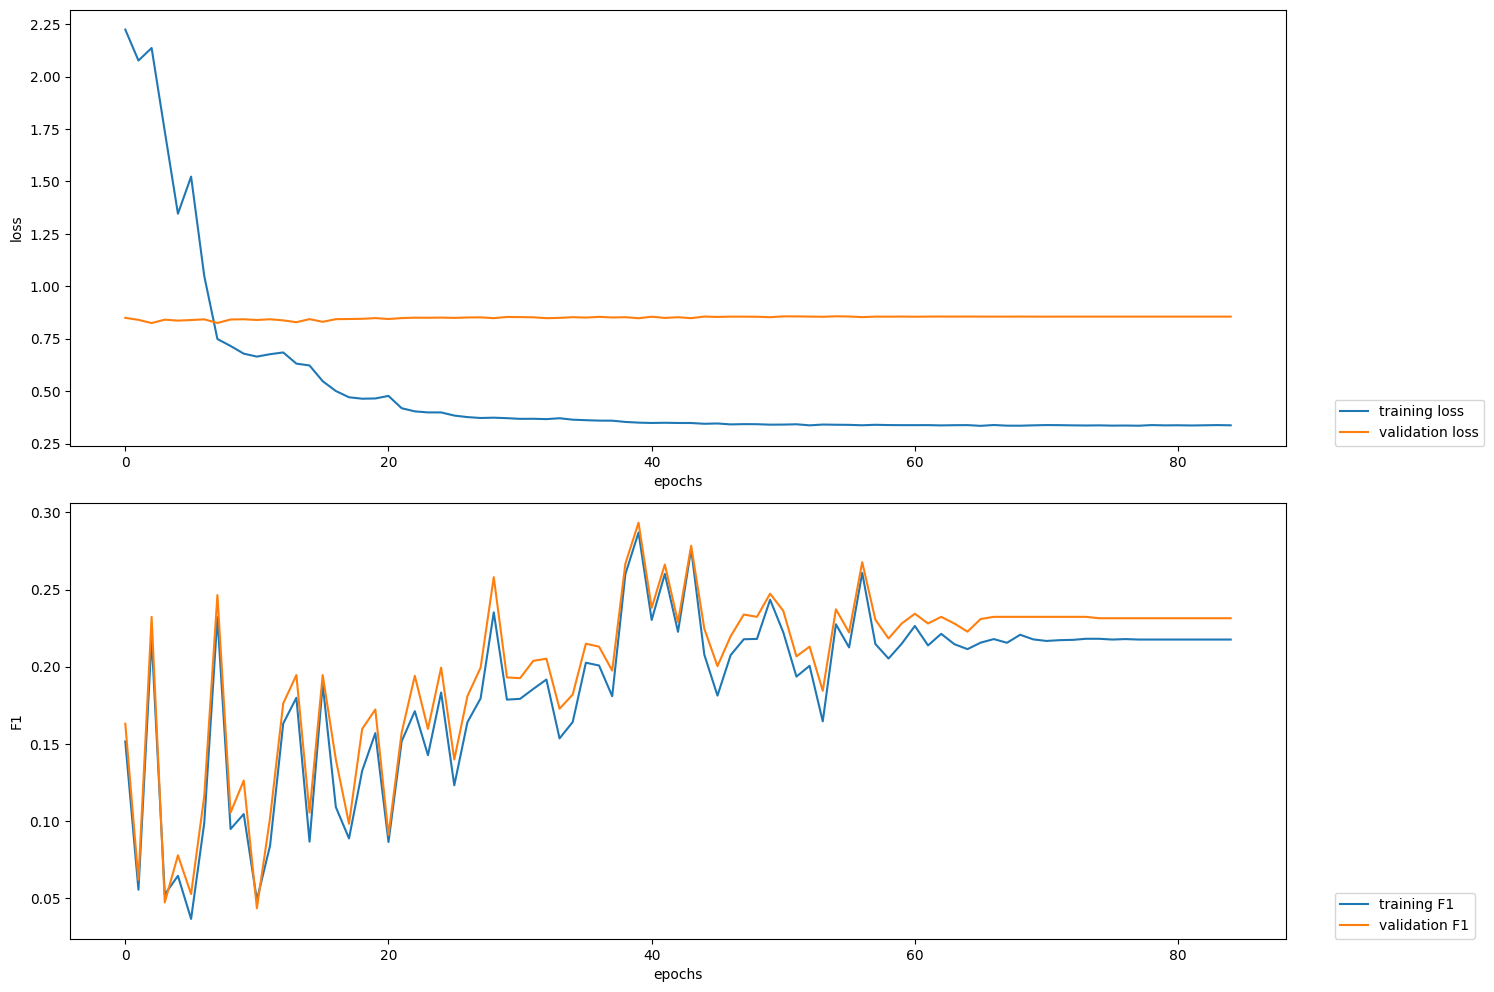

100%|██████████| 79/79 [00:23<00:00,  3.39it/s]

2023-04-21 06:25:41,207 Evaluating as a multi-label problem: True



100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

2023-04-21 06:25:45,743 Evaluating as a multi-label problem: False



100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

2023-04-21 06:25:50,322 Evaluating as a multi-label problem: True


,split,index,I-ADR,B-ADR,B-Drug,I-Finding,B-Finding,B-Disease,B-Symptom,I-Symptom,I-Disease,I-Drug,micro avg,macro avg,weighted avg,samples avg
0,train,precision,0.569678,0.592429,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577215,0.216211,0.554591,0.037744
1,train,recall,0.298126,0.255730,0.000716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227545,0.055457,0.227545,0.037739
2,train,f1-score,0.391416,0.357249,0.001432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326413,0.075010,0.305234,0.037740
3,train,support,7953.000000,4712.000000,1396.000000,349.0,309.0,231.0,222.0,218.0,169.0,161.0,15720.000000,15720.000000,15720.000000,15720.000000
4,dev,precision,0.530000,0.599303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552424,0.112930,0.436654,NaN
5,dev,recall,0.329193,0.264209,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237173,0.059340,0.237173,NaN
6,dev,f1-score,0.406130,0.366738,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331866,0.077287,0.305454,NaN
7,dev,support,966.000000,651.000000,184.000000,54.0,64.0,31.0,25.0,36.0,28.0,27.0,2066.000000,2066.000000,2066.000000,NaN
8,test,precision,0.600000,0.675000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624324,0.127500,0.487179,0.039040
9,test,recall,0.310238,0.281250,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232278,0.059149,0.232278,0.038998


In [17]:
print(suf)

os.mkdir('flair_ner_model'+suf+'/classification_report')
plotter.plot_training_curves('flair_ner_model'+suf+'/loss.tsv')

# evaluate the tagger on the test set
result = tagger.evaluate(corpus.train, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/train.txt', 'w').write(str(result))
res1 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res1.insert(loc=0, column='split', value='train')

result = tagger.evaluate(corpus.dev, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/dev.txt', 'w').write(str(result))
res2 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res2.insert(loc=0, column='split', value='dev')

result = tagger.evaluate(corpus.test, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/test.txt', 'w').write(str(result))
res3 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res3.insert(loc=0, column='split', value='test')

res = pd.concat([res1,res2,res3],ignore_index=True)
res.to_csv('flair_ner_model'+suf+'/classification_report.csv',index=False)
res

In [18]:
# import time
# start_time = time.time()
# while time.time() - start_time < 1:
#     time.sleep(1)
# print('Session has timed out (2 minutes). Disconnecting...')
# !kill -9 -1

Layering can be a good idea if the NER tags in the first layer have their own set of dependent values in the second layer. This can help capture more information about the entities being recognized and provide more context for downstream tasks. However, it also increases the complexity of the annotation and the training process, so it should be used judiciously. In general, it's a good idea to start with a simple tag scheme and gradually increase complexity as needed.

    does it really matter if u use the E header

It depends on the specific task and the requirements of the downstream model. In some cases, using the E tag can help disambiguate between overlapping entities, while in other cases it may not be necessary or even desired. Ultimately, it's up to the developer to determine the appropriate tagging scheme for their specific use case.

    would adding POS as an extra NER layer help model performance or not

Adding POS as an extra NER layer may or may not help model performance, depending on the specific use case and data being analyzed.

On one hand, incorporating POS tags could provide additional context to the model and help it better distinguish between named entities and other parts of speech. For example, knowing that a word is a noun or verb could help the model determine if it is likely to be a named entity or not.

On the other hand, adding an additional layer could also increase model complexity and training time without necessarily improving performance. It may also require additional manual annotation efforts to create a labeled dataset with both NER and POS tags.

Ultimately, whether to include POS as an additional layer will depend on the specific requirements and goals of the project, as well as the available data and resources.

    besides bioes ordering (which is up-to-down), it doesn't matter what order the tags in the same domain appear in left-to-right?

Yes, that is correct. As long as the BIOES order is maintained vertically, the order of tags in the same domain from left-to-right should not impact training in flai

    different typenames must be treated as separate tasks?

Yes, that's correct. Different typenames should be treated as separate tasks because they represent different types of annotations that you want to predict. For example, in a biomedical NER task, you might want to predict the entity types of both drugs and diseases, which would be represented by two different typenames in your annotation data. Predicting both types of entities would require different models and possibly different evaluation metrics.